<p align="center" style="font-size:32px;">
  <strong>Loan Approval Model</strong><br>
  by Raj Chandravanshi
</p>


# Objective
To predict the likelihood of loan approval using demographic, financial, and credit history features via various
machine learning and deep learning models.

# Loading Libraries

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Know Our Loan Approval Dataset

#### 📁 Dataset Source
- Source: [Kaggle - Loan Approval Dataset](https://www.kaggle.com/datasets/taweilo/loan-approval-classification-data)



In [2]:
df = pd.read_csv('loan_data.csv')
df.sample(5)

person_age person_gender person_education  person_income  \
15380        24.0          male        Associate       159002.0   
34134        25.0          male         Bachelor       116678.0   
25436        32.0          male        Associate        46079.0   
40047        24.0          male      High School        59155.0   
7673         25.0          male         Bachelor        32252.0   

       person_emp_exp person_home_ownership  loan_amnt        loan_intent  \
15380               0              MORTGAGE    14000.0            VENTURE   
34134               2                  RENT    25000.0          EDUCATION   
25436              11                   OWN     5000.0            MEDICAL   
40047               0              MORTGAGE     6000.0            MEDICAL   
7673                3                  RENT     7000.0  DEBTCONSOLIDATION   

       loan_int_rate  loan_percent_income  cb_person_cred_hist_length  \
15380          17.49                 0.09                         2.0   
34134          12.42                 0.21                         3.0   
25436          15.37                 0.11                         5.0   
40047          10.95                 0.10                         4.0   
7673            6.92                 0.22                         3.0   

       credit_score previous_loan_defaults_on_file  loan_status  
15380           596                            Yes            0  
34134           702                             No            0  
25436           629                             No            0  
40047           493                            Yes            0  
7673            678                            Yes            0

In [3]:
print(f"The {df.shape[1]} columns and {df.shape[0]} rows present in the data.")

The 14 columns and 45000 rows present in the data.


In [4]:
colnames = df.columns
print(colnames)

Index(['person_age', 'person_gender', 'person_education', 'person_income',
       'person_emp_exp', 'person_home_ownership', 'loan_amnt', 'loan_intent',
       'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length',
       'credit_score', 'previous_loan_defaults_on_file', 'loan_status'],
      dtype='object')


In [5]:
df.isnull().sum()

person_age                        0
person_gender                     0
person_education                  0
person_income                     0
person_emp_exp                    0
person_home_ownership             0
loan_amnt                         0
loan_intent                       0
loan_int_rate                     0
loan_percent_income               0
cb_person_cred_hist_length        0
credit_score                      0
previous_loan_defaults_on_file    0
loan_status                       0
dtype: int64

In [6]:
print(f'Number of Duplicates =  {df.duplicated().sum()}')
print("No Dupicate row present in the dataset.")

Number of Duplicates =  0
No Dupicate row present in the dataset.


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

### Insights: 

#### Dataset Summary
- Total Records: **45,000**
- Total Features: **14**
- Target Variable: `loan_status` (Binary Classification)
- No **missing** or **duplicate** values found in the dataset.

#### Categorical Columns
- `person_gender`
- `person_education`
- `person_home_ownership`
- `loan_intent`
- `previous_loan_defaults_on_file`
- `loan_status` *(Target Column: `0` = Loan not approved, `1` = Loan approved)*

#### Numerical Columns
- `person_age`
- `person_income`
- `person_emp_exp`
- `loan_amnt`
- `loan_int_rate`
- `loan_percent_income`
- `cb_person_cred_hist_length`
- `credit_score`


# Exploratory Data Analysis.

In [8]:
categorical_df = df.select_dtypes(include = ['object'])
numerical_df = df.select_dtypes(include = ['number']).iloc[:,:-1] # target column are not include

## Univariate Analysis
Univariate analysis examines each variable individually to understand its distribution, central tendency, and spread. Common techniques include histograms, boxplots, and summary statistics.

In [9]:
# Descriptive Statistics of the Loan Approval Class
df[df['loan_status'] == 1].describe()

person_age  person_income  person_emp_exp     loan_amnt  \
count  10000.000000   10000.000000    10000.000000  10000.000000   
mean      27.521300   59886.096900        5.178000  10855.689800   
std        5.939063   45338.315604        5.913207   7111.701674   
min       20.000000    8000.000000        0.000000    900.000000   
25%       23.000000   36841.750000        1.000000   5000.000000   
50%       26.000000   50629.000000        3.000000   9750.000000   
75%       30.000000   71888.250000        8.000000  15000.000000   
max       70.000000  845636.000000       47.000000  35000.000000   

       loan_int_rate  loan_percent_income  cb_person_cred_hist_length  \
count   10000.000000         10000.000000                10000.000000   
mean       12.856794             0.202521                    5.759700   
std         3.068512             0.106514                    3.904674   
min         5.420000             0.000000                    2.000000   
25%        10.990000             0.110000                    3.000000   
50%        12.980000             0.200000                    4.000000   
75%        15.230000             0.280000                    8.000000   
max        20.000000             0.620000                   30.000000   

       credit_score  loan_status  
count  10000.000000      10000.0  
mean     631.887200          1.0  
std       50.293485          0.0  
min      431.000000          1.0  
25%      601.000000          1.0  
50%      639.000000          1.0  
75%      669.000000          1.0  
max      767.000000          1.0

In [10]:
# Descriptive Statistics of the Loan Not Approved Class
df[df['loan_status'] == 0].describe()

person_age  person_income  person_emp_exp     loan_amnt  \
count  35000.000000   3.500000e+04    35000.000000  35000.000000   
mean      27.833571   8.615704e+04        5.476714   9219.576914   
std        6.073367   8.703524e+04        6.104261   6018.933416   
min       20.000000   9.595000e+03        0.000000    500.000000   
25%       24.000000   5.147650e+04        1.000000   5000.000000   
50%       26.000000   7.292800e+04        4.000000   8000.000000   
75%       30.000000   1.019940e+05        8.000000  12000.000000   
max      144.000000   7.200766e+06      125.000000  35000.000000   

       loan_int_rate  loan_percent_income  cb_person_cred_hist_length  \
count   35000.000000         35000.000000                35000.000000   
mean       10.477981             0.121783                    5.898286   
std         2.731490             0.071339                    3.872042   
min         5.420000             0.000000                    2.000000   
25%         7.900000             0.070000                    3.000000   
50%        10.850000             0.110000                    4.000000   
75%        12.290000             0.160000                    8.000000   
max        20.000000             0.660000                   30.000000   

       credit_score  loan_status  
count  35000.000000      35000.0  
mean     632.814914          0.0  
std       50.475294          0.0  
min      390.000000          0.0  
25%      602.000000          0.0  
50%      640.000000          0.0  
75%      670.000000          0.0  
max      850.000000          0.0

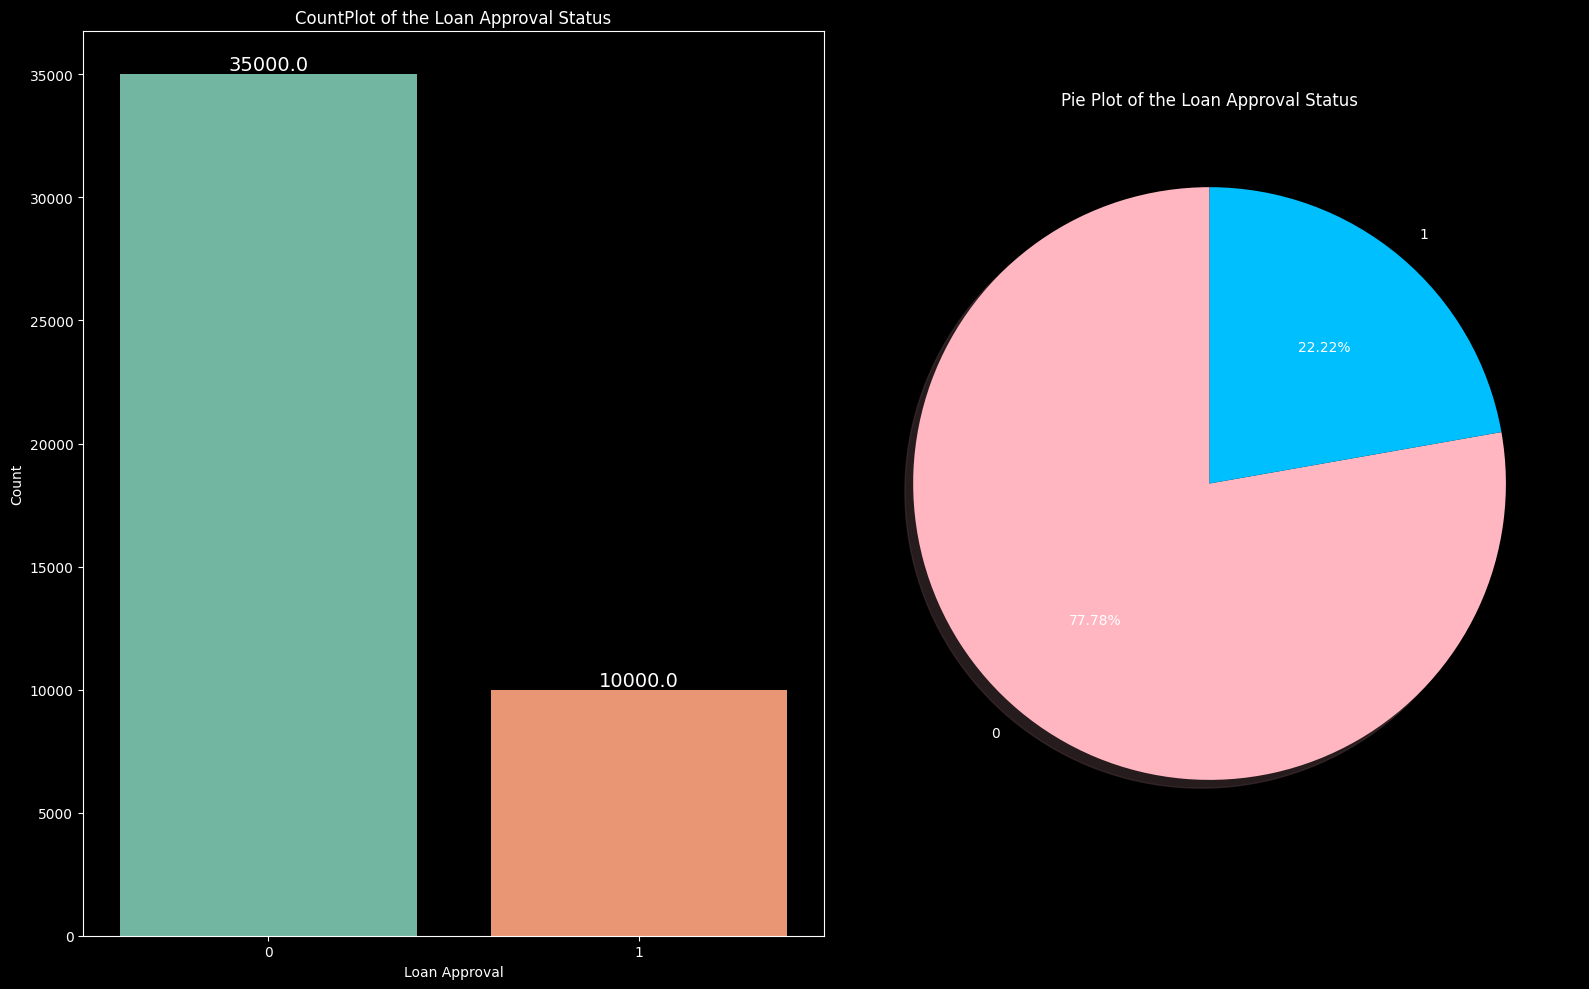

In [11]:
# Count and Pie plot of Loan Status Column
plt.style.use('dark_background')
plt.figure(figsize=(16,10))
plt.subplot(1,2,1)
ax = sns.countplot(x = df['loan_status'], data = df, palette = 'Set2')
for p in ax.patches:
    height = p.get_height()
    ax.annotate(
        f'{height}',
        (p.get_x() + p.get_width()/2, height),
        ha = 'center', va = 'bottom', fontsize = 14
    )
plt.title("CountPlot of the Loan Approval Status")
plt.xlabel('Loan Approval')
plt.ylabel('Count')

plt.subplot(1,2,2)
pie = df['loan_status'].value_counts()

plt.pie(
    pie.values,
    labels=pie.index,
    colors=['lightpink', 'deepskyblue', 'lightcoral'],  
    autopct='%0.2f%%',
    startangle=90,
    shadow=True
)
plt.title('Pie Plot of the Loan Approval Status')

plt.tight_layout()
plt.show()

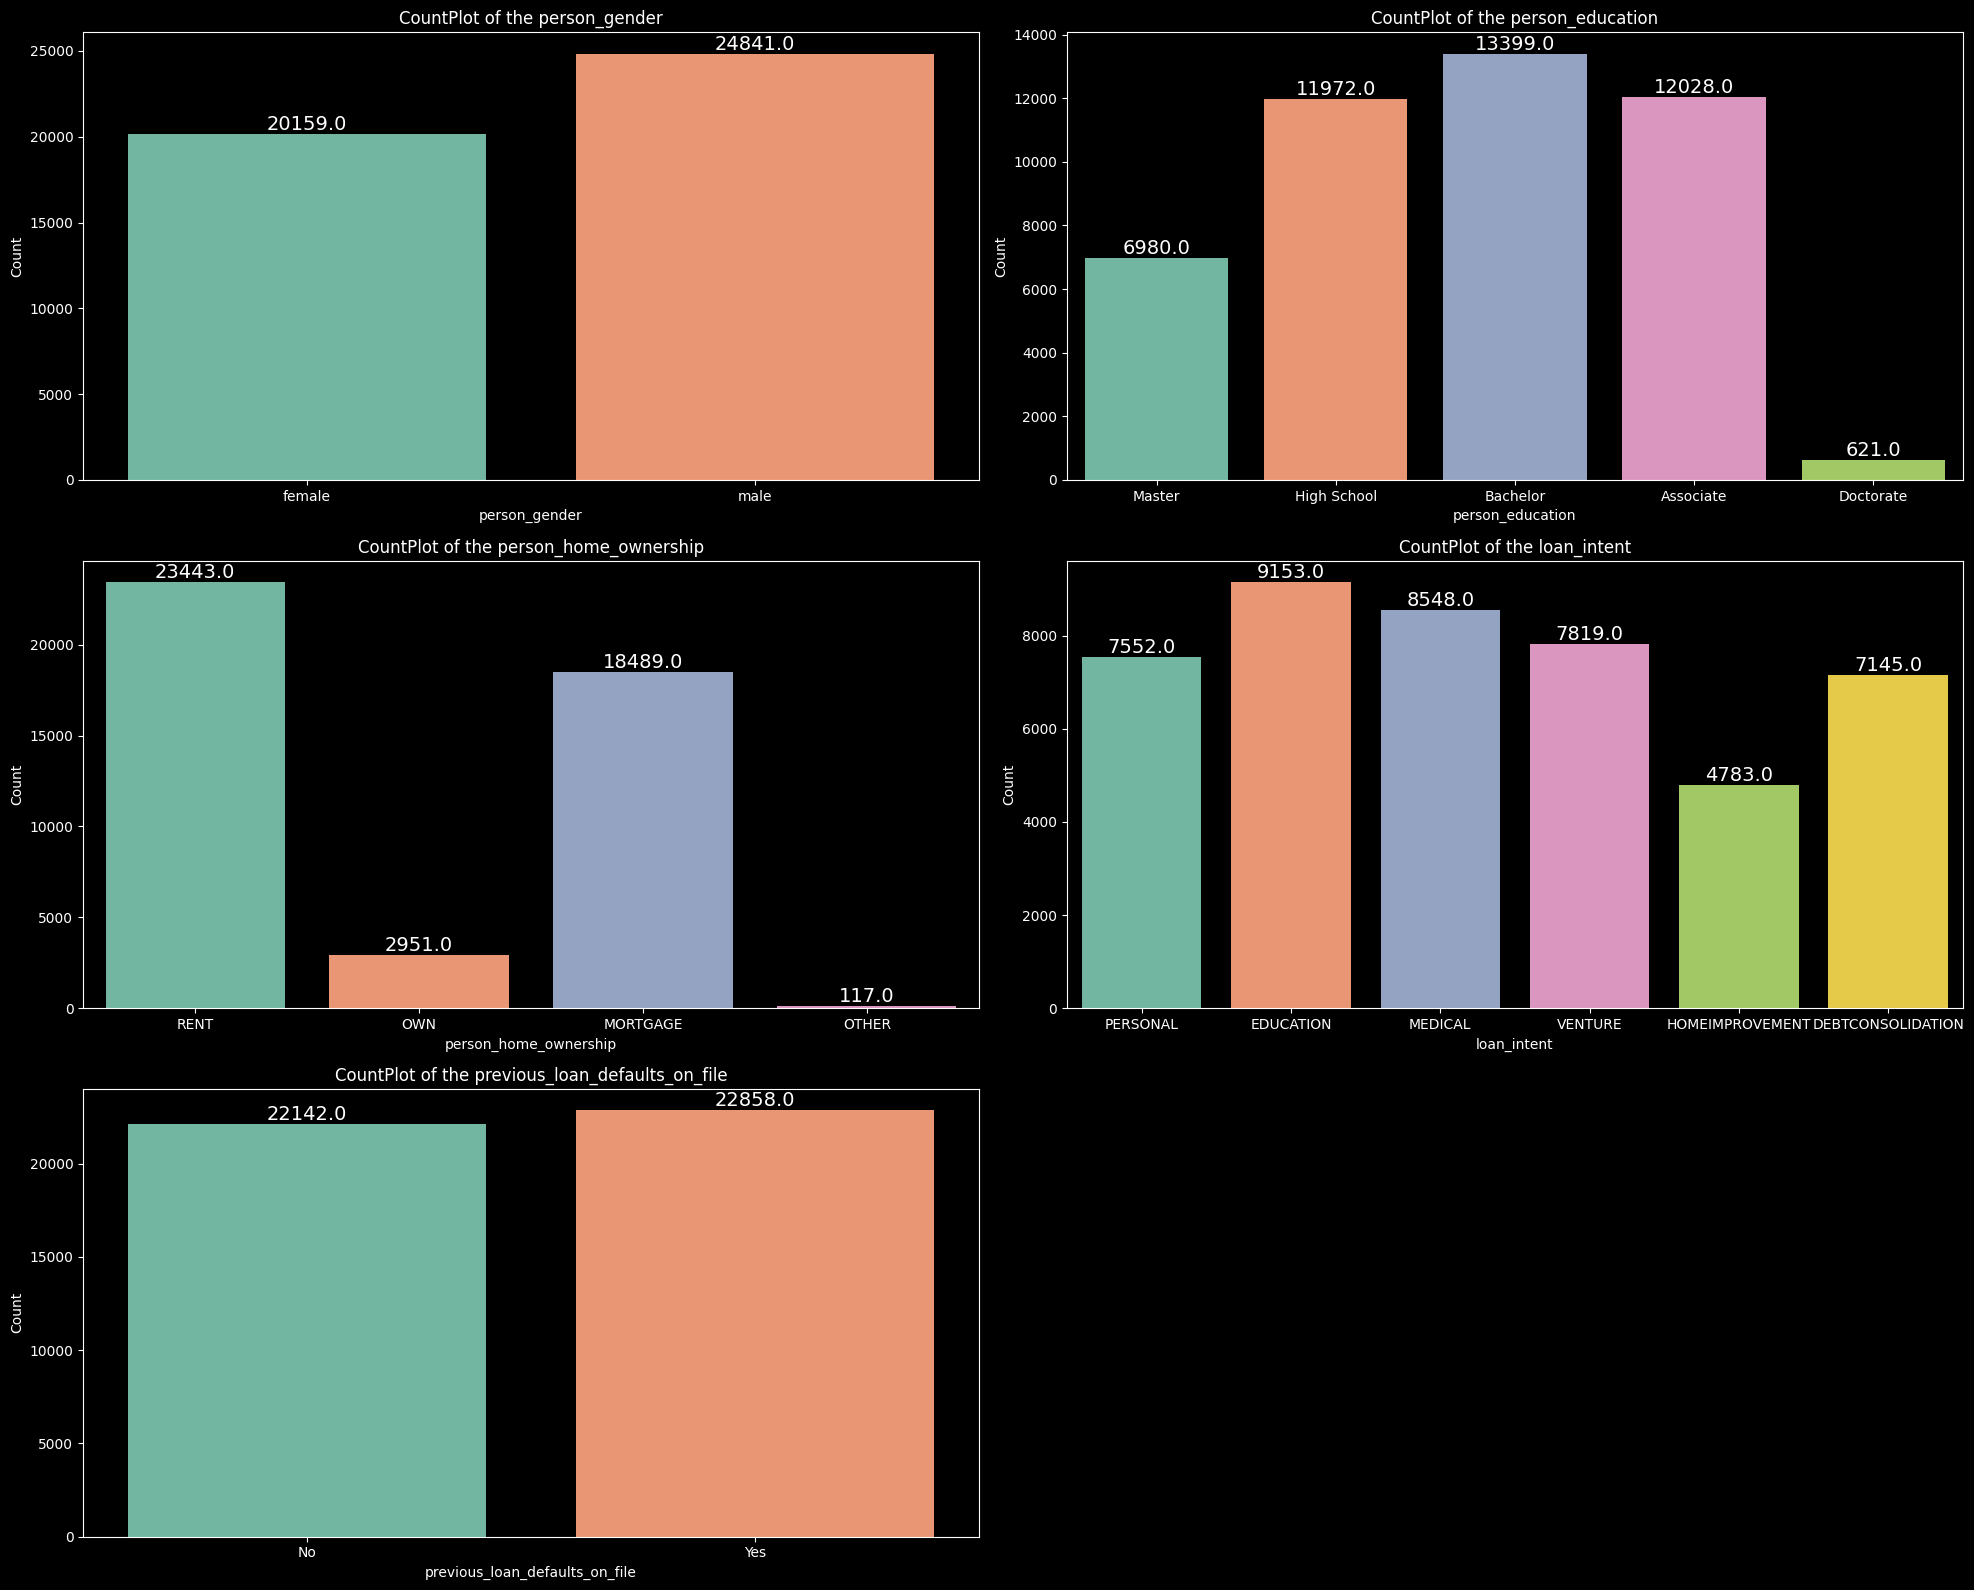

In [12]:
# Count Plot of the categorical Columns
plt.figure(figsize=(20,16))
for i, col in enumerate(categorical_df, 1):
    plt.subplot(3,2,i)
    ax = sns.countplot(x = col, data = categorical_df, palette = 'Set2')
    for p in ax.patches:
        height = p.get_height()
        ax.annotate(
            f'{height}',
            (p.get_x() + p.get_width()/2, height),
            ha = 'center', va = 'bottom', fontsize = 14
        )
    plt.title(f"CountPlot of the {col}")
    plt.xlabel(col)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

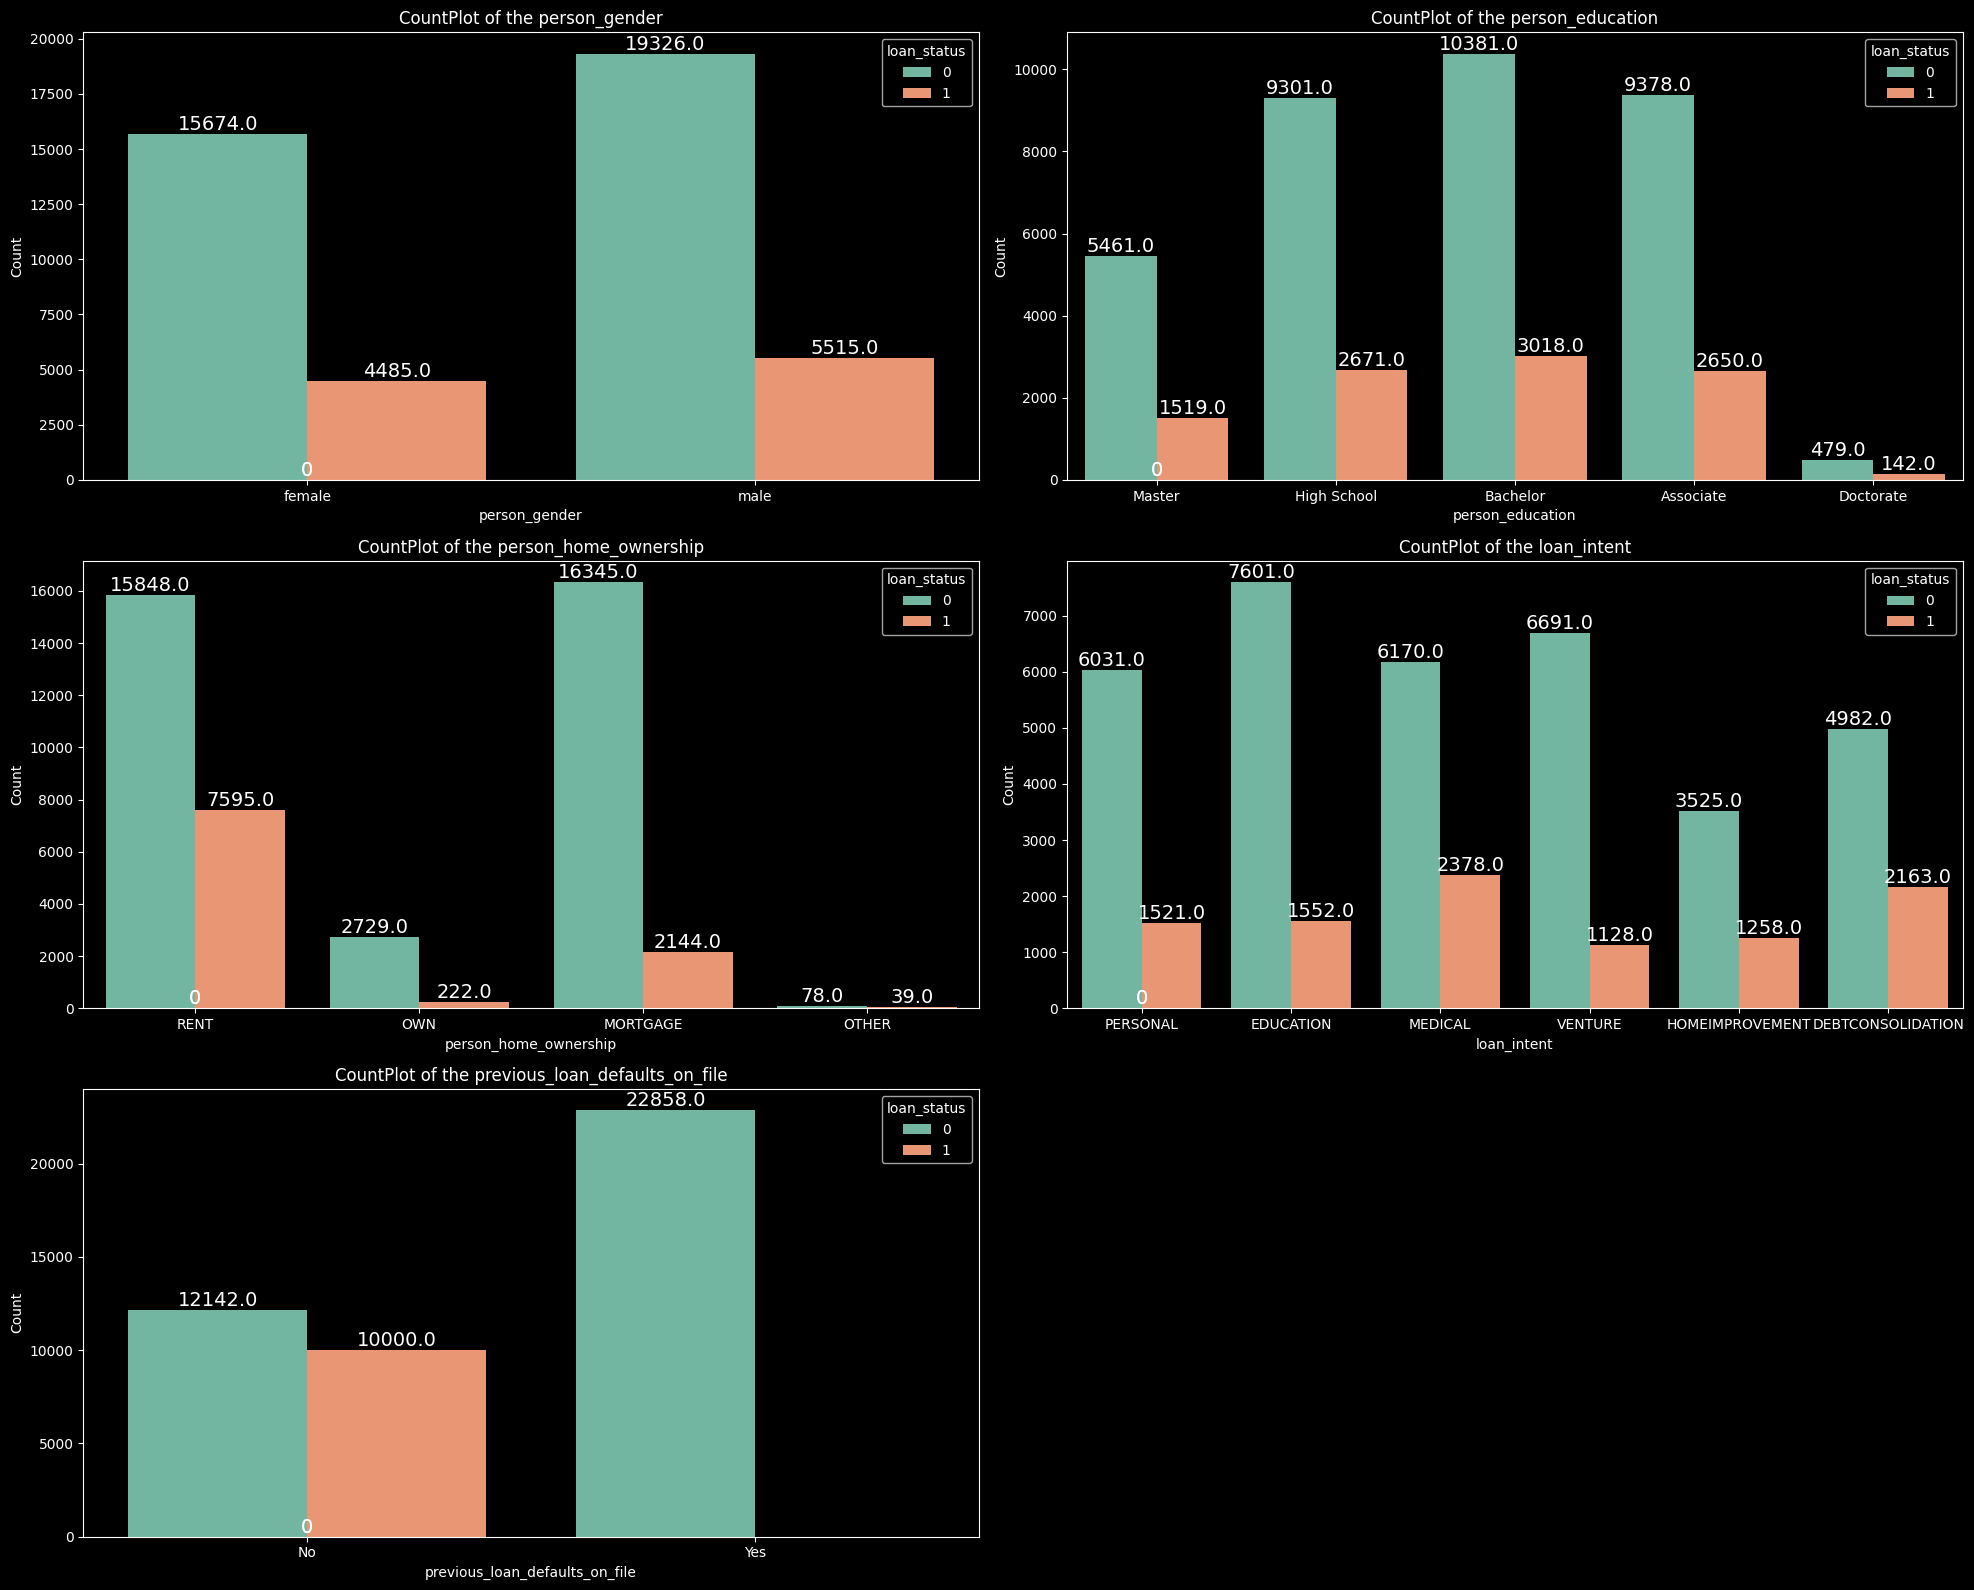

In [13]:
# loan_status wise count plot of numerical columns
plt.figure(figsize=(20,16))
for i, col in enumerate(categorical_df, 1):
    plt.subplot(3,2,i)
    ax = sns.countplot(x = col, data = categorical_df, palette = 'Set2', hue = df['loan_status'])
    for p in ax.patches:
        height = p.get_height()
        ax.annotate(
            f'{height}',
            (p.get_x() + p.get_width()/2, height),
            ha = 'center', va = 'bottom', fontsize = 14
        )
    plt.title(f"CountPlot of the {col}")
    plt.xlabel(col)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()


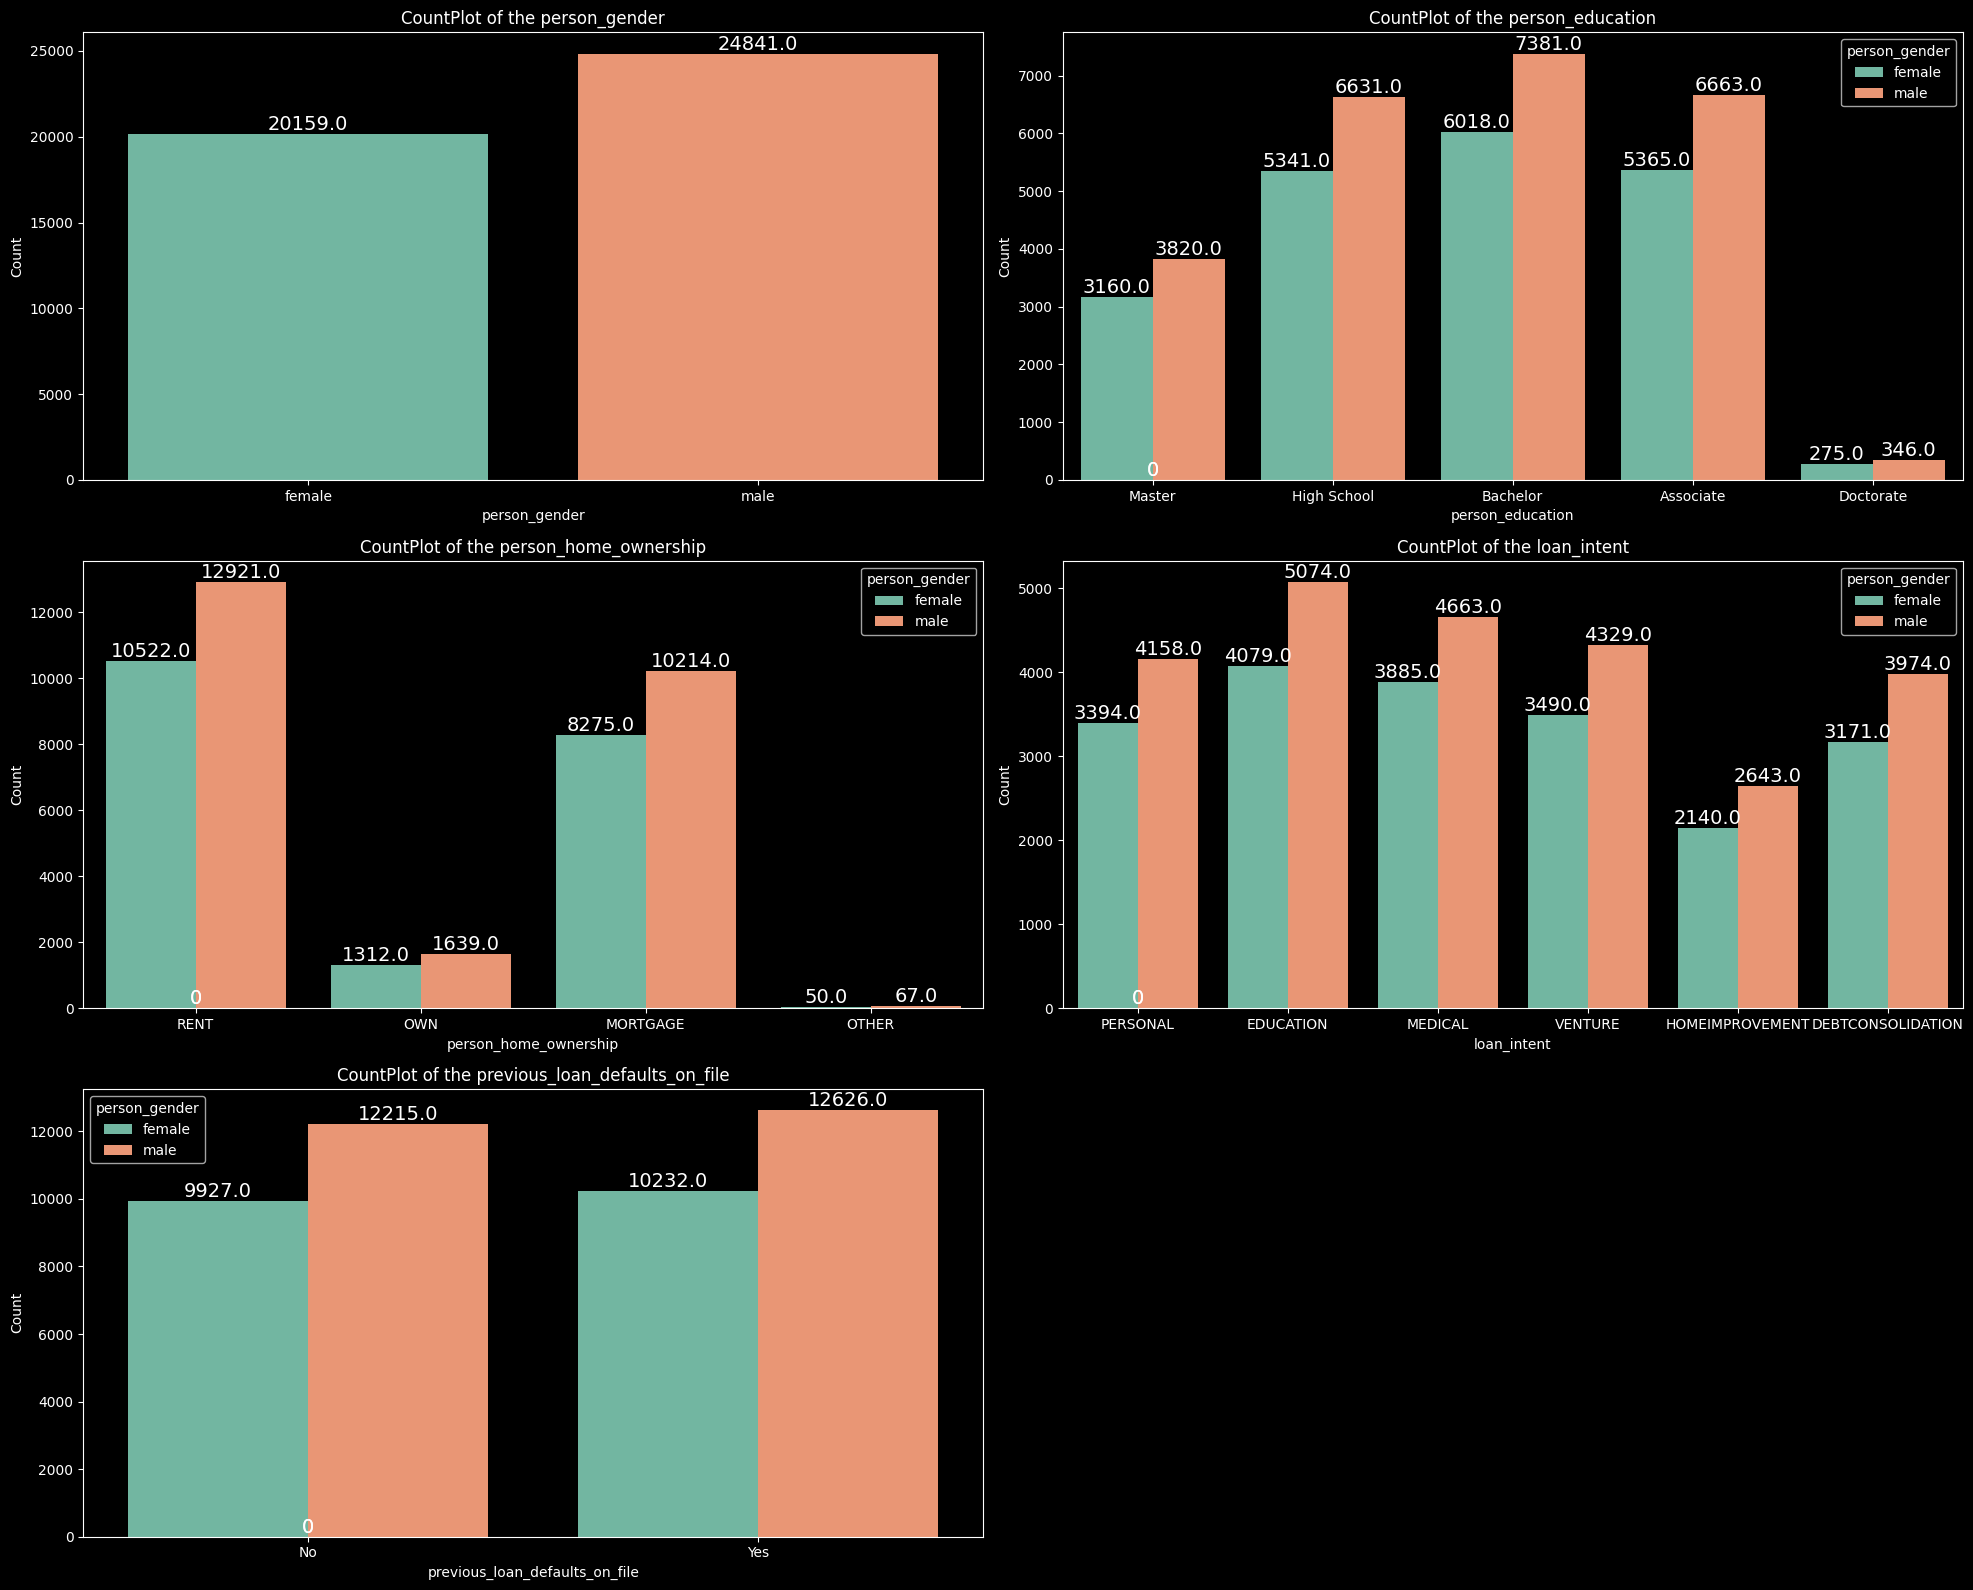

In [14]:
# Gender wise count plot of numerical columns
plt.figure(figsize=(20,16))
for i, col in enumerate(categorical_df, 1):
    plt.subplot(3,2,i)
    ax = sns.countplot(x = col, data = categorical_df, palette = 'Set2', hue = df['person_gender'])
    for p in ax.patches:
        height = p.get_height()
        ax.annotate(
            f'{height}',
            (p.get_x() + p.get_width()/2, height),
            ha = 'center', va = 'bottom', fontsize = 14
        )
    plt.title(f"CountPlot of the {col}")
    plt.xlabel(col)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

# EDA Insights

## Loan Status Distribution
- **35,000** (77.78%) not approved  
- **10,000** (22.22%) approved  
> **Imbalanced dataset** with majority of loans not approved.

## Gender Distribution

| Gender | Total | Not Approved | Approved |
|--------|-------|--------------|----------|
| Female | 20,159 | 15,674 | 4,485 |
| Male   | 24,841 | 19,326 | 5,515 |

## Education Level

| Education Level    | Total  | Not Approved | Approved |
|--------------------|--------|--------------|----------|
| Doctorate          | 621    | 479          | 142      |
| Associate Degree   | 12,028 | 9,378        | 2,650    |
| Master's Degree    | 6,980  | 5,461        | 1,519    |
| Bachelor's Degree  | 13,399 | 10,381       | 3,018    |
| High School        | 11,972 | 9,301        | 2,671    |

## Home Ownership

| Home Ownership | Total  | Not Approved | Approved |
|----------------|--------|--------------|----------|
| Own            | 2,951  | 2,729        | 222      |
| Rent           | 23,443 | 15,848       | 7,595    |
| Mortgage       | 18,489 | 16,345       | 2,144    |
| Other          | 117    | 78           | 39       |

## Loan Intent

| Intent              | Total | Not Approved | Approved |
|---------------------|--------|--------------|----------|
| Personal            | 7,552  | 6,031        | 1,521    |
| Education           | 9,153  | 7,601        | 1,552    |
| Medical             | 8,548  | 6,170        | 2,378    |
| Venture             | 7,819  | 6,691        | 1,128    |
| Home Improvement    | 4,783  | 3,525        | 1,258    |
| Debt Consolidation  | 7,145  | 4,982        | 2,163    |

## Previous Loan Default

| Default Status | Total   | Not Approved | Approved |
|----------------|---------|--------------|----------|
| No             | 22,142  | 12,142       | 10,000   |
| Yes            | 22,858  | 22,858       | 0        |

> **None** of the previously defaulted applicants were approved for a loan.


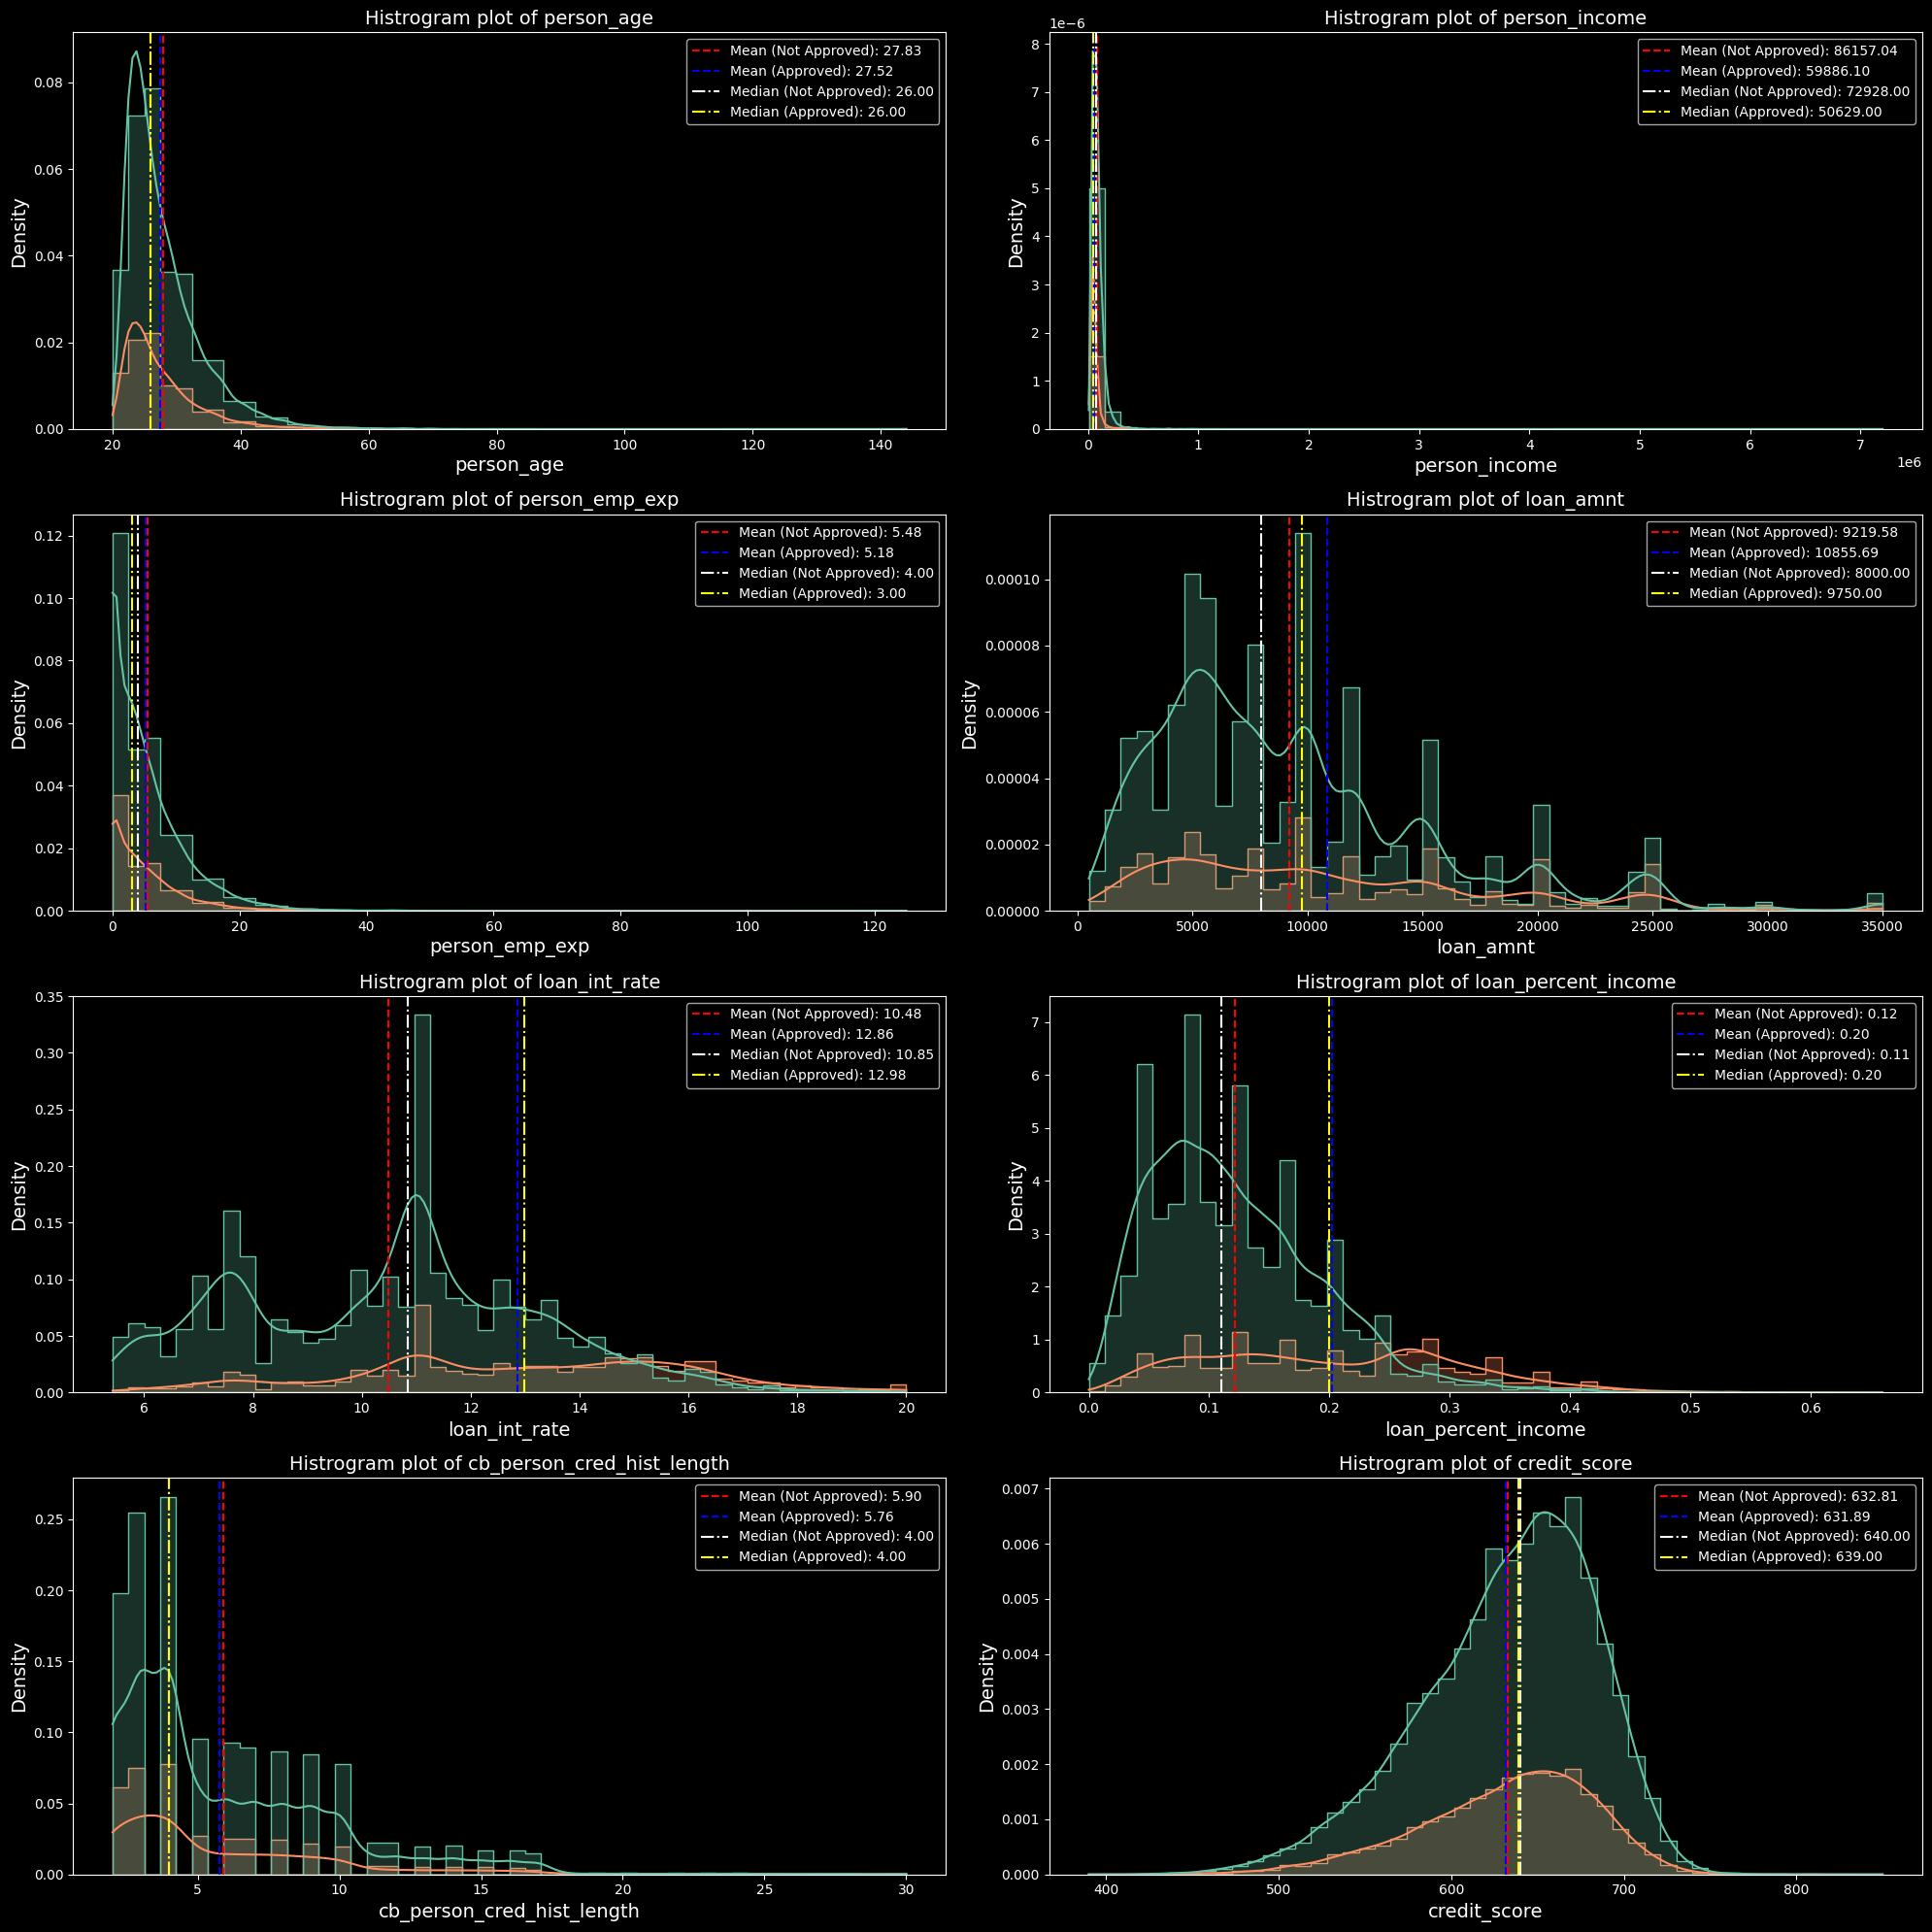

In [15]:
# Histogram plot of the numerical columns
plt.style.use('dark_background')
plt.figure(figsize=(20, 20))
for i, col in enumerate(numerical_df.columns, 1):
    plt.subplot(4, 2, i)
    
    sns.histplot(data=numerical_df, x=col, hue=df['loan_status'], kde=True, palette='Set2', element='step', stat='density', bins=50)
    
    
    col_mean_0 = df.loc[df['loan_status'] == 0, col].mean() # Mean of Not Approved class
    col_mean_1 = df.loc[df['loan_status'] == 1, col].mean() # Mean of Loan Approved class
    
    col_median_0 = df.loc[df['loan_status'] == 0, col].median() # Median of Loan Not Approved class
    col_median_1 = df.loc[df['loan_status'] == 1, col].median() # Median of Loan Approved class
    
    # Plot mean lines
    plt.axvline(col_mean_0, color='red', linestyle='--', label=f'Mean (Not Approved): {col_mean_0:.2f}')
    plt.axvline(col_mean_1, color='blue', linestyle='--', label=f'Mean (Approved): {col_mean_1:.2f}')
    
    # Plot median lines
    plt.axvline(col_median_0, color='white', linestyle='-.', label=f'Median (Not Approved): {col_median_0:.2f}')
    plt.axvline(col_median_1, color='yellow', linestyle='-.', label=f'Median (Approved): {col_median_1:.2f}')
    
    plt.title(f"Histrogram plot of {col}", fontsize = 14)
    plt.xlabel(col, fontsize = 14)
    plt.ylabel('Density', fontsize = 14)
    plt.legend()

plt.tight_layout()
plt.show()

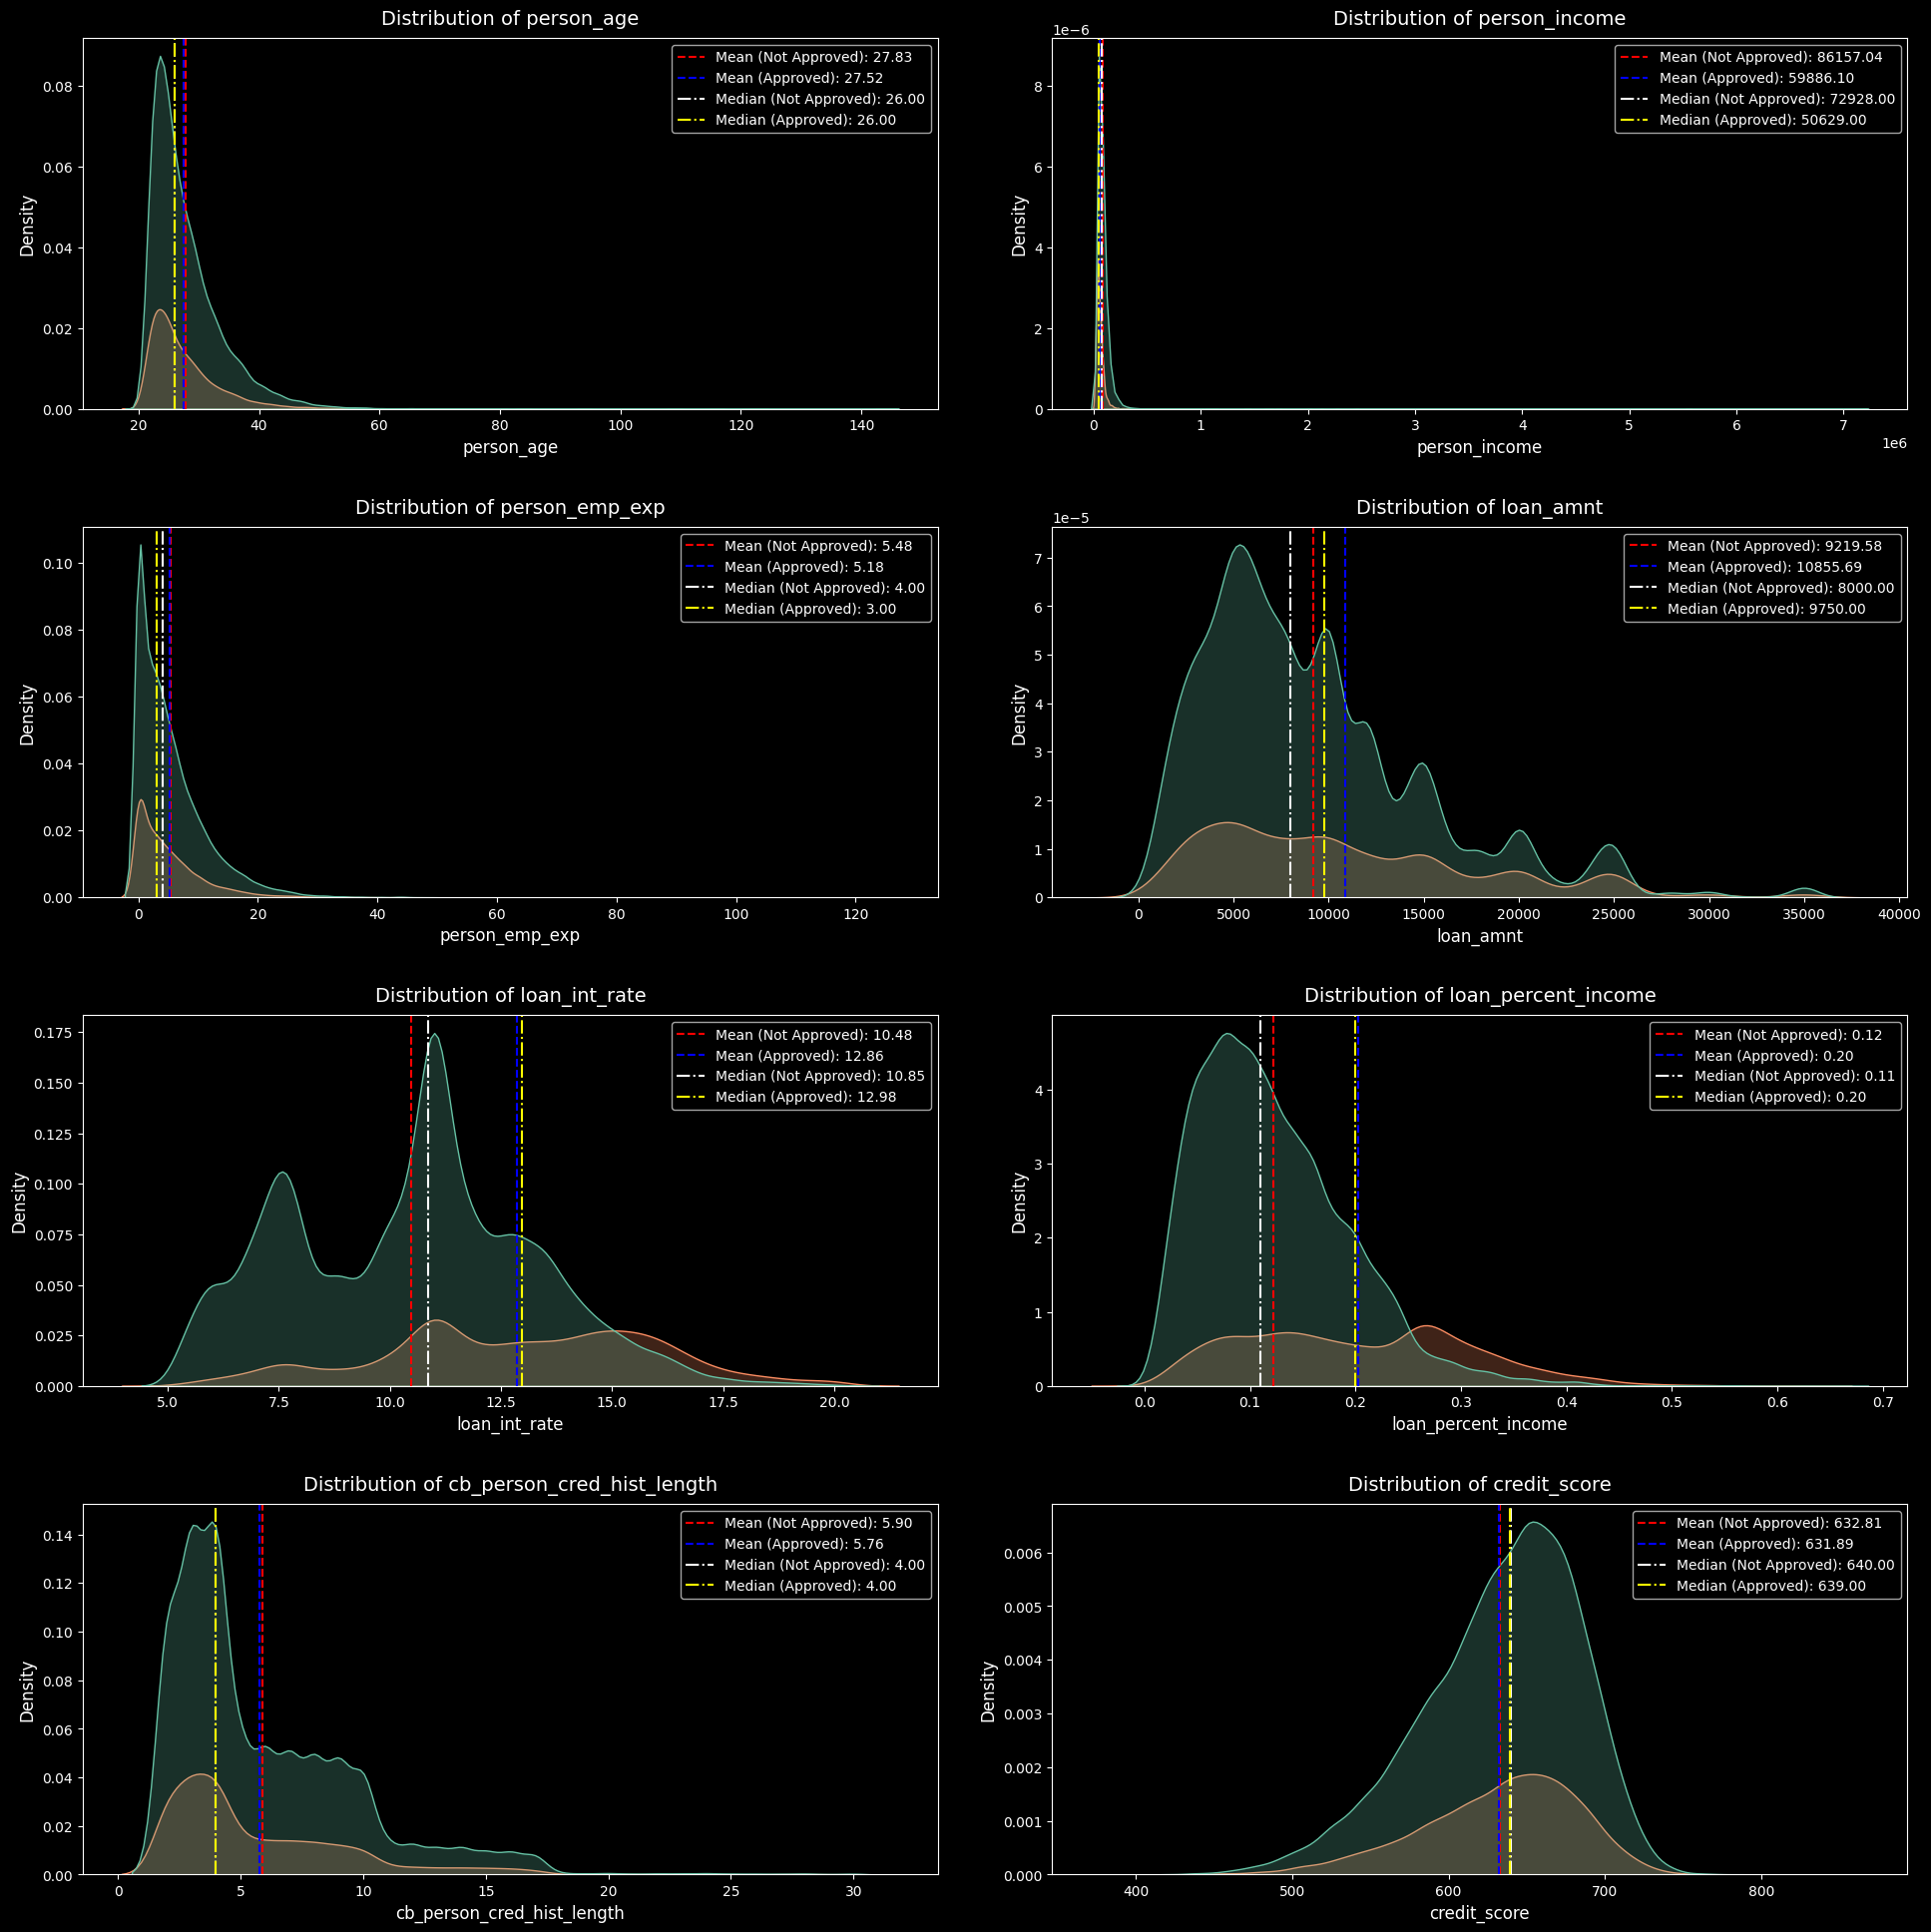

In [16]:
# Distribution Plot of the numerical columns
plt.figure(figsize=(20,20))
for i, col in enumerate(numerical_df, 1):
    plt.subplot(4,2,i)
    ax = sns.kdeplot(x = col, data = numerical_df, palette = 'Set2', hue = df['loan_status'], fill=True)
    plt.title(f"Distribution of {col}", fontsize=14, pad=10)

    col_mean_0 = df.loc[df['loan_status'] == 0, col].mean() # Mean of Not Approved class
    col_mean_1 = df.loc[df['loan_status'] == 1, col].mean() # Mean of Loan Approved class
    
    col_median_0 = df.loc[df['loan_status'] == 0, col].median() # Median of Loan Not Approved class
    col_median_1 = df.loc[df['loan_status'] == 1, col].median() # Median of Loan Approved class
    
    # Plot mean lines
    plt.axvline(col_mean_0, color='red', linestyle='--', label=f'Mean (Not Approved): {col_mean_0:.2f}')
    plt.axvline(col_mean_1, color='blue', linestyle='--', label=f'Mean (Approved): {col_mean_1:.2f}')
    
    # Plot median lines
    plt.axvline(col_median_0, color='white', linestyle='-.', label=f'Median (Not Approved): {col_median_0:.2f}')
    plt.axvline(col_median_1, color='yellow', linestyle='-.', label=f'Median (Approved): {col_median_1:.2f}')

    plt.legend()
    plt.xlabel(col, fontsize = 12)
    plt.ylabel('Density', fontsize = 12)

plt.tight_layout(pad = 3)
plt.show()

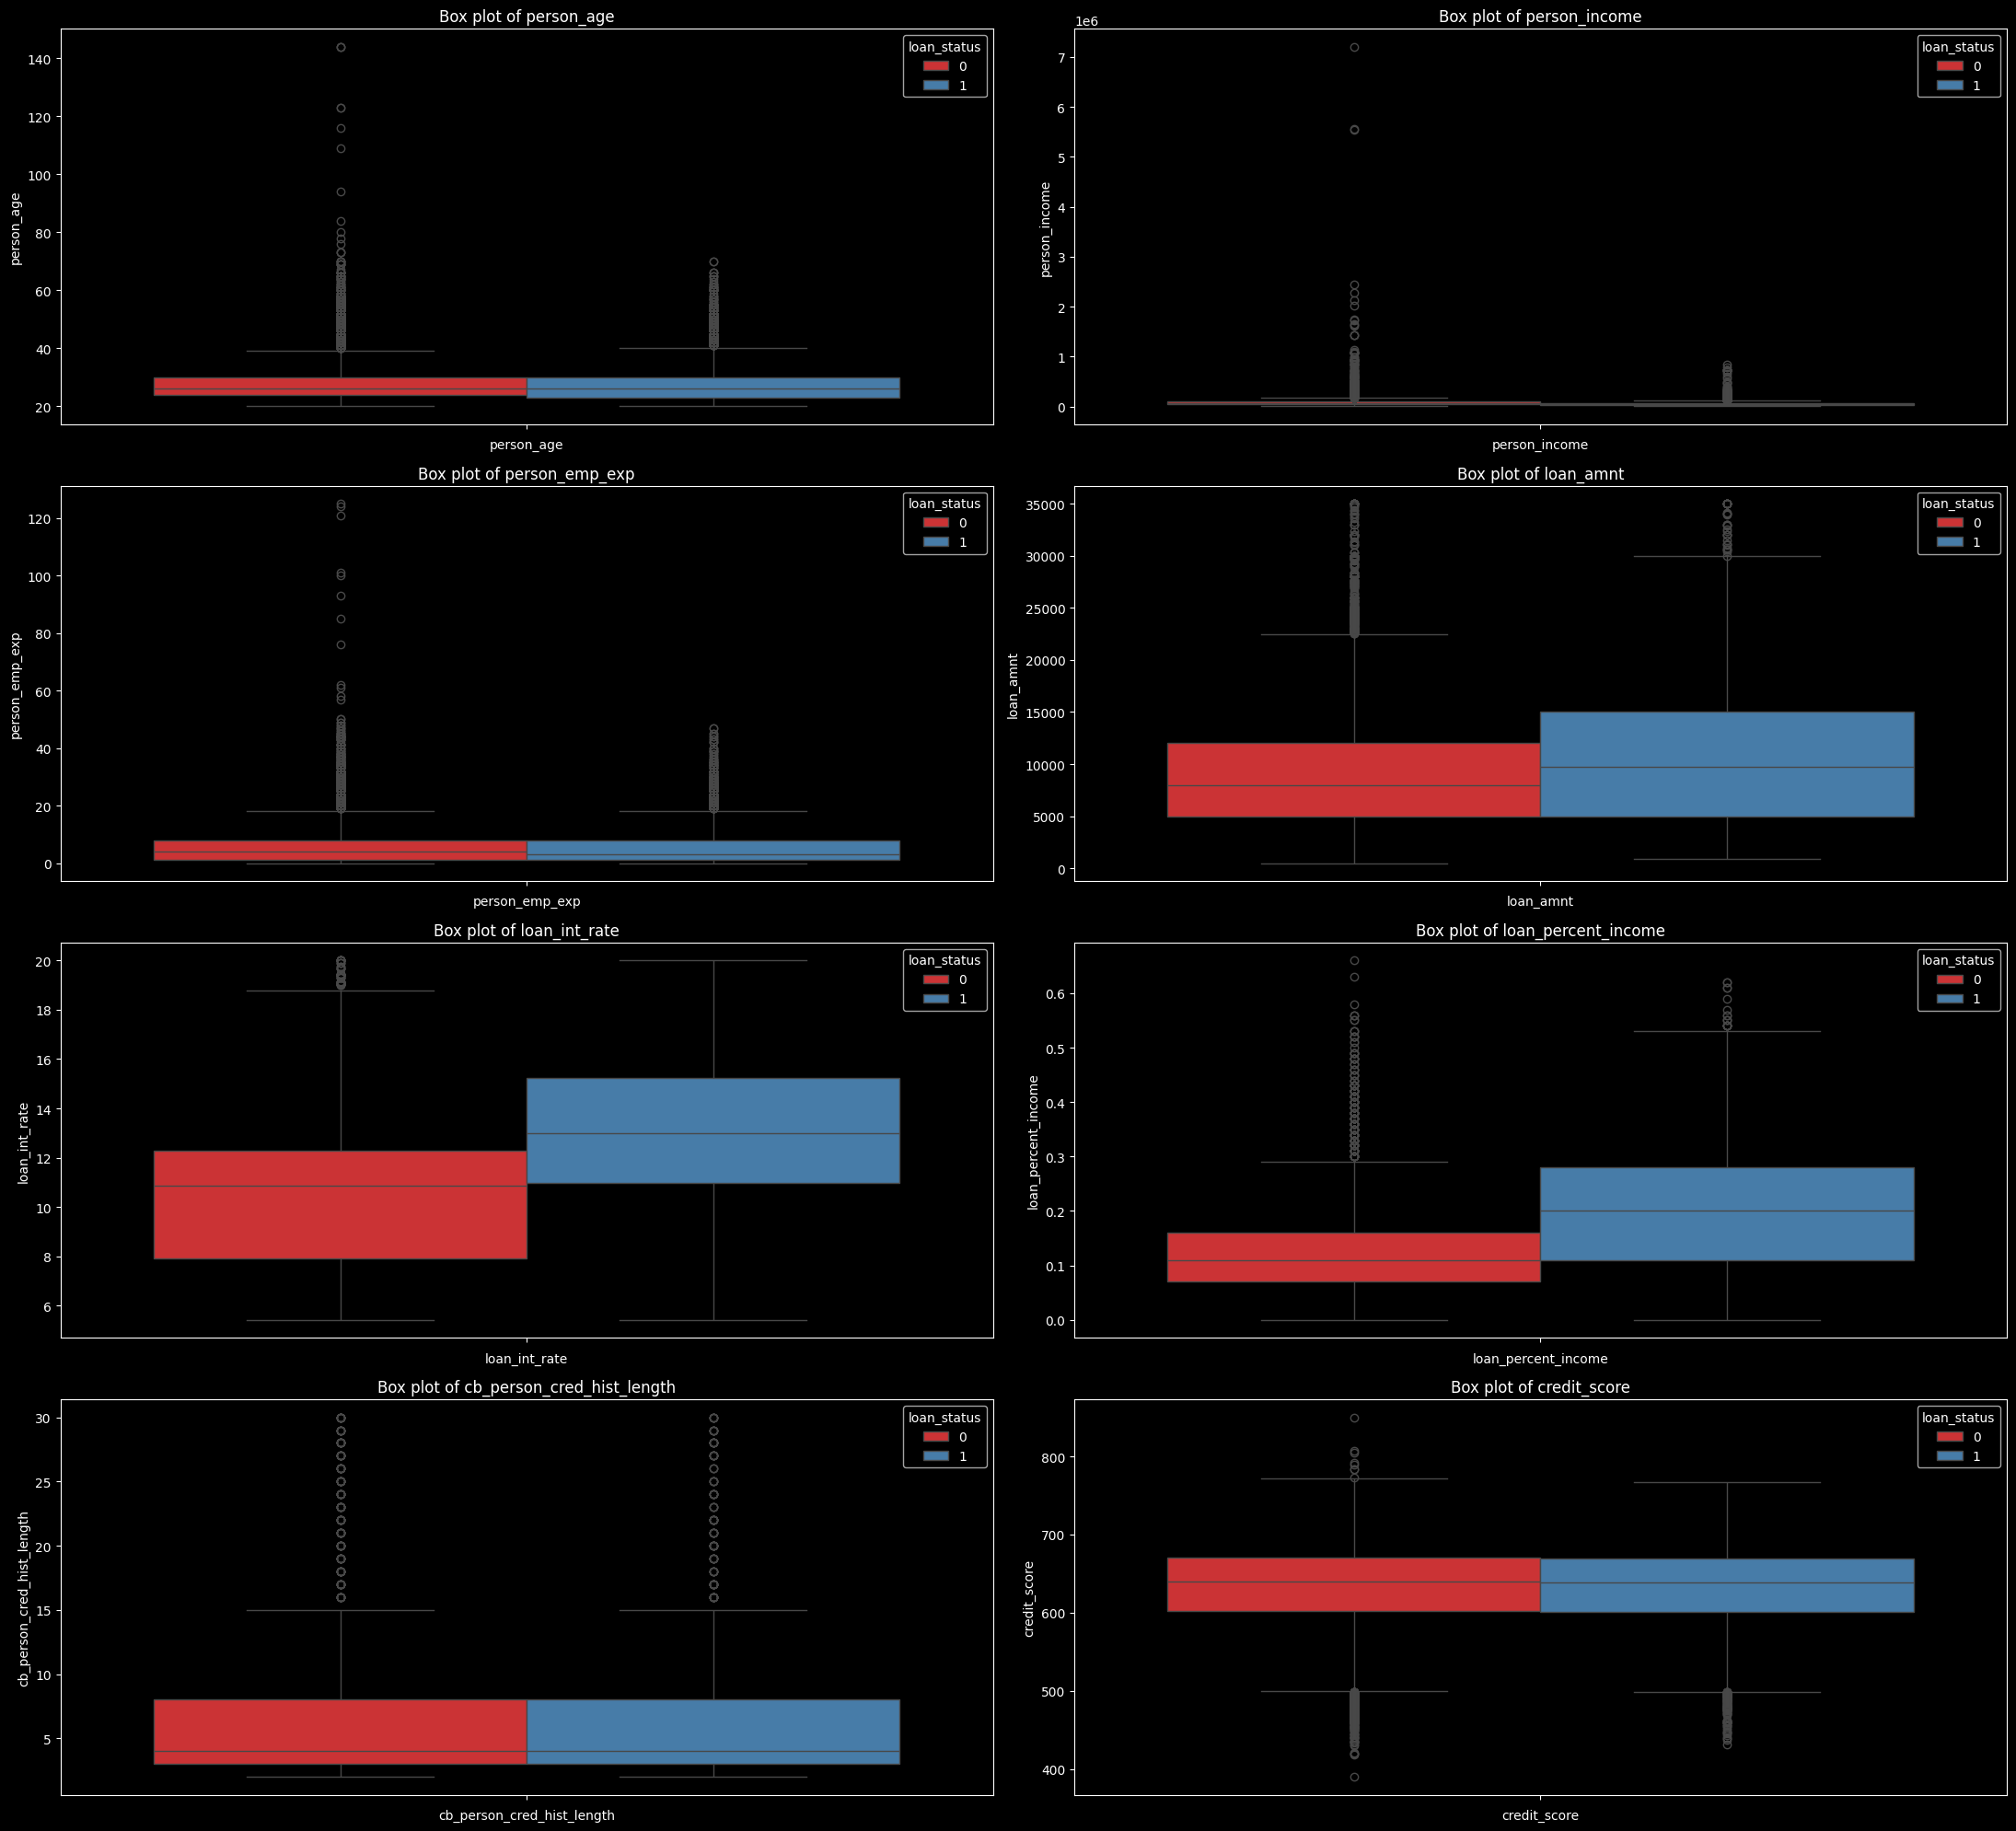

In [17]:
# Box plot of Numerical columns
plt.figure(figsize=(22,20))
for i, col in enumerate(numerical_df, 1):
    plt.subplot(4,2,i)
    ax = sns.boxplot(y = col, data = numerical_df, palette = 'Set1', hue = df['loan_status'])
    plt.title(f"Box plot of {col}")
    plt.xlabel(col)

plt.tight_layout()
plt.show()

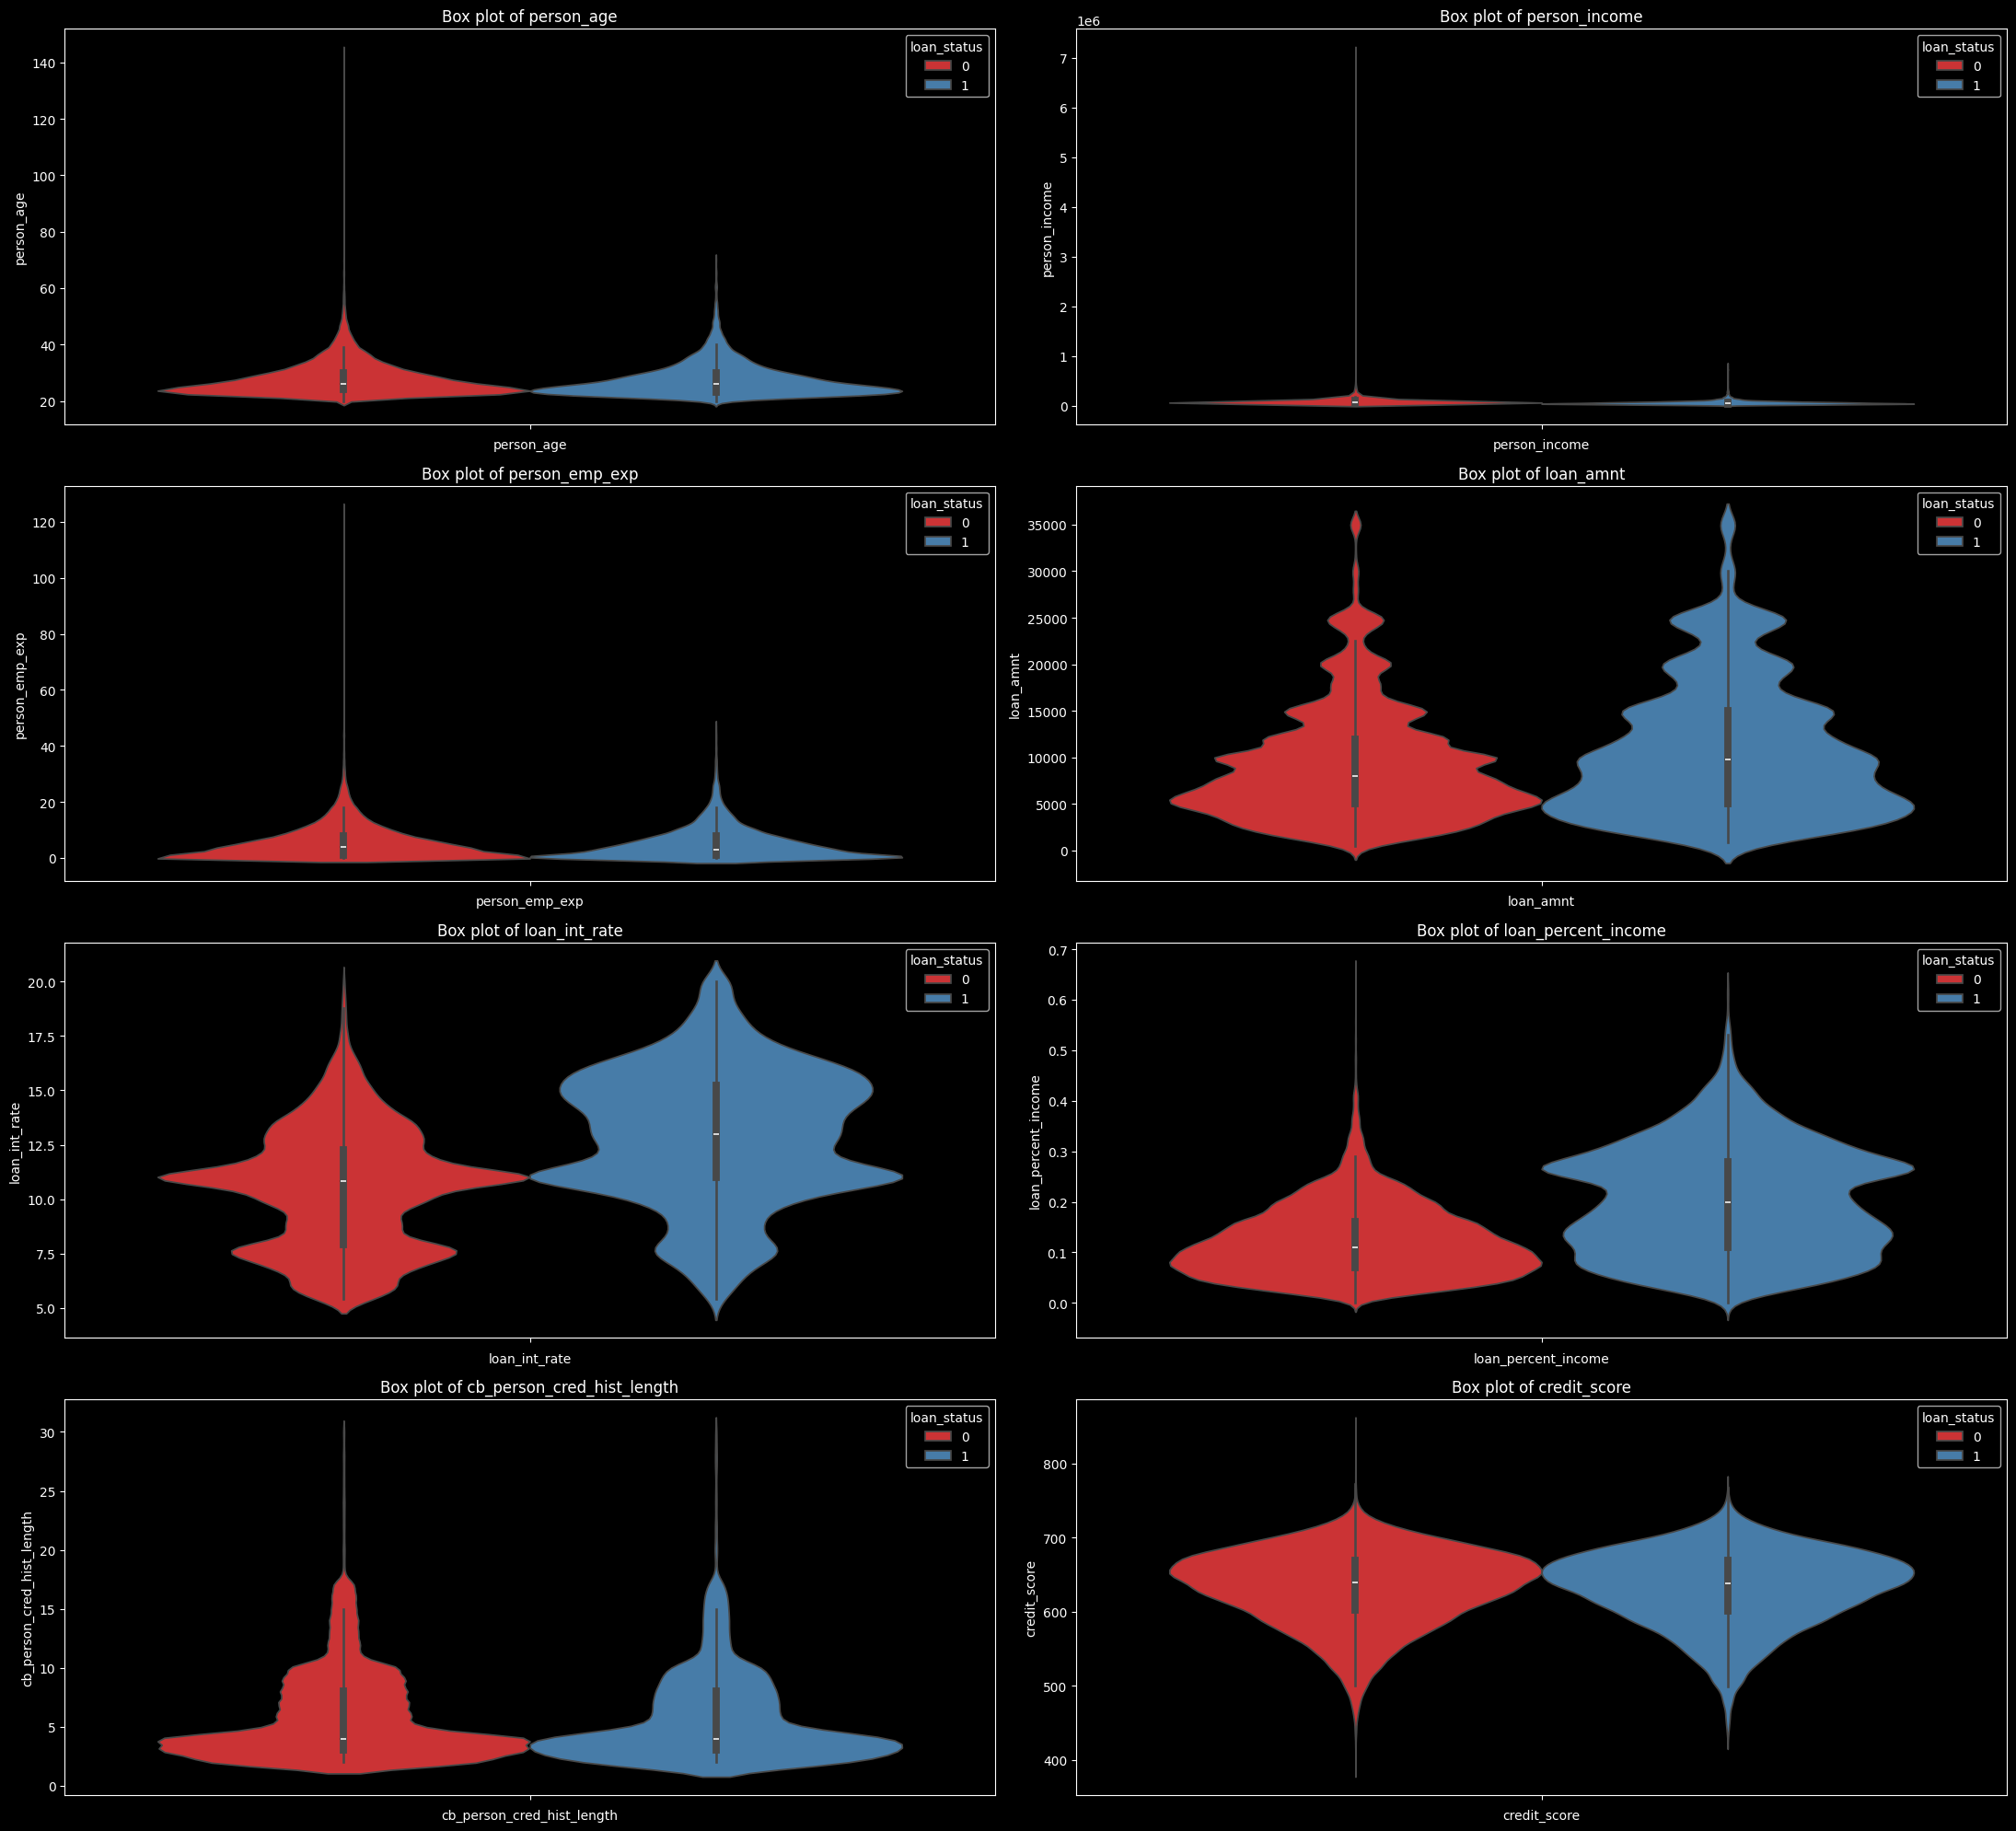

In [18]:
# Violion plot of Numerical columns
plt.figure(figsize=(22,20))
for i, col in enumerate(numerical_df, 1):
    plt.subplot(4,2,i)
    ax = sns.violinplot(y = col, data = numerical_df, palette = 'Set1', hue = df['loan_status'])
    plt.title(f"Box plot of {col}")
    plt.xlabel(col)

plt.tight_layout()
plt.show()

### Numerical Columns Insights
- The above two graphs show the distribution of numerical columns with respect to the loan status class. Mean and median lines are also displayed in each graph for comparison.
- The the boxplot show the outlier in the dataset 

## Multivariate Analysis

Multivariate analysis examines the relationships between two or more variables simultaneously.  
This helps uncover patterns, correlations, and interactions that may influence loan approval decisions.

Common techniques include:
- Scatter plots
- Pair plots
- Heatmaps (correlation matrices)

In [19]:
numerical_df['previous_loan_defaults_on_file'] = df['previous_loan_defaults_on_file'].apply(lambda x: 0 if x == 'Yes' else 1)

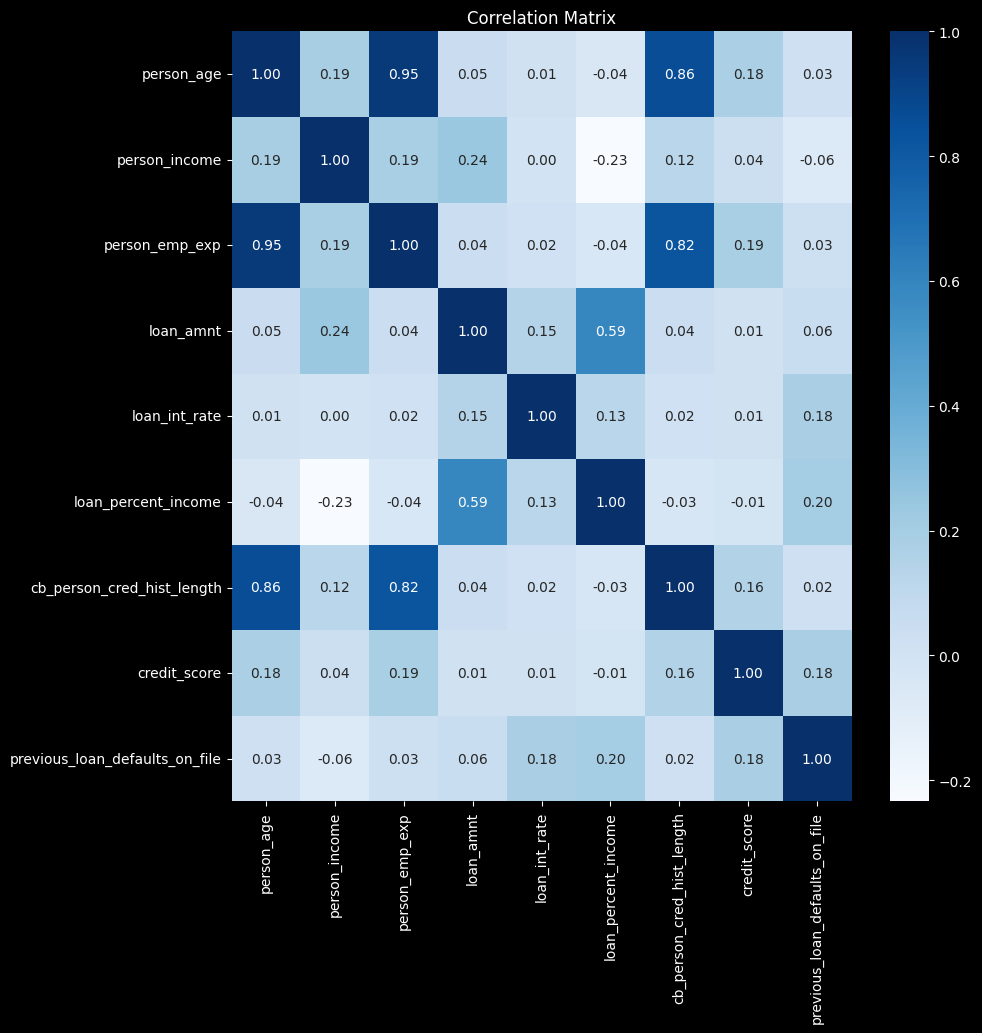

In [20]:
corr = numerical_df.corr()
plt.figure(figsize = (10,10))
sns.heatmap(data=corr, annot=True, fmt='.2f', cmap='Blues')
plt.title('Correlation Matrix')
plt.show()

## Correlation Matrix Insights

The correlation matrix shows how numerical variables in the dataset relate to each other using Pearson correlation coefficients.

### Key Observations

- **Strong Positive Correlations:**
  - `person_age` and `person_emp_exp` (**0.95**): Older individuals tend to have more work experience.
  - `person_age` and `cb_person_cred_hist_length` (**0.86**): Older individuals usually have a longer credit history.
  - `person_emp_exp` and `cb_person_cred_hist_length` (**0.82**): More experienced individuals also have longer credit histories.

- **Moderate Correlations:**
  - `loan_amnt` and `loan_percent_income` (**0.59**): Larger loans consume a higher percentage of income.
  - `loan_amnt` and `person_income` (**0.24**): Higher-income individuals generally take larger loans.

- **Weak or No Correlation:**
  - `loan_int_rate`, `credit_score`, and some other variables show very weak or no significant linear correlation with other features.


In [24]:
numerical_df.iloc[:,:-1]

person_age  person_income  person_emp_exp  loan_amnt  loan_int_rate  \
0            22.0        71948.0               0    35000.0          16.02   
1            21.0        12282.0               0     1000.0          11.14   
2            25.0        12438.0               3     5500.0          12.87   
3            23.0        79753.0               0    35000.0          15.23   
4            24.0        66135.0               1    35000.0          14.27   
...           ...            ...             ...        ...            ...   
44995        27.0        47971.0               6    15000.0          15.66   
44996        37.0        65800.0              17     9000.0          14.07   
44997        33.0        56942.0               7     2771.0          10.02   
44998        29.0        33164.0               4    12000.0          13.23   
44999        24.0        51609.0               1     6665.0          17.05   

       loan_percent_income  cb_person_cred_hist_length  credit_score  
0                     0.49                         3.0           561  
1                     0.08                         2.0           504  
2                     0.44                         3.0           635  
3                     0.44                         2.0           675  
4                     0.53                         4.0           586  
...                    ...                         ...           ...  
44995                 0.31                         3.0           645  
44996                 0.14                        11.0           621  
44997                 0.05                        10.0           668  
44998                 0.36                         6.0           604  
44999                 0.13                         3.0           628  

[45000 rows x 8 columns]

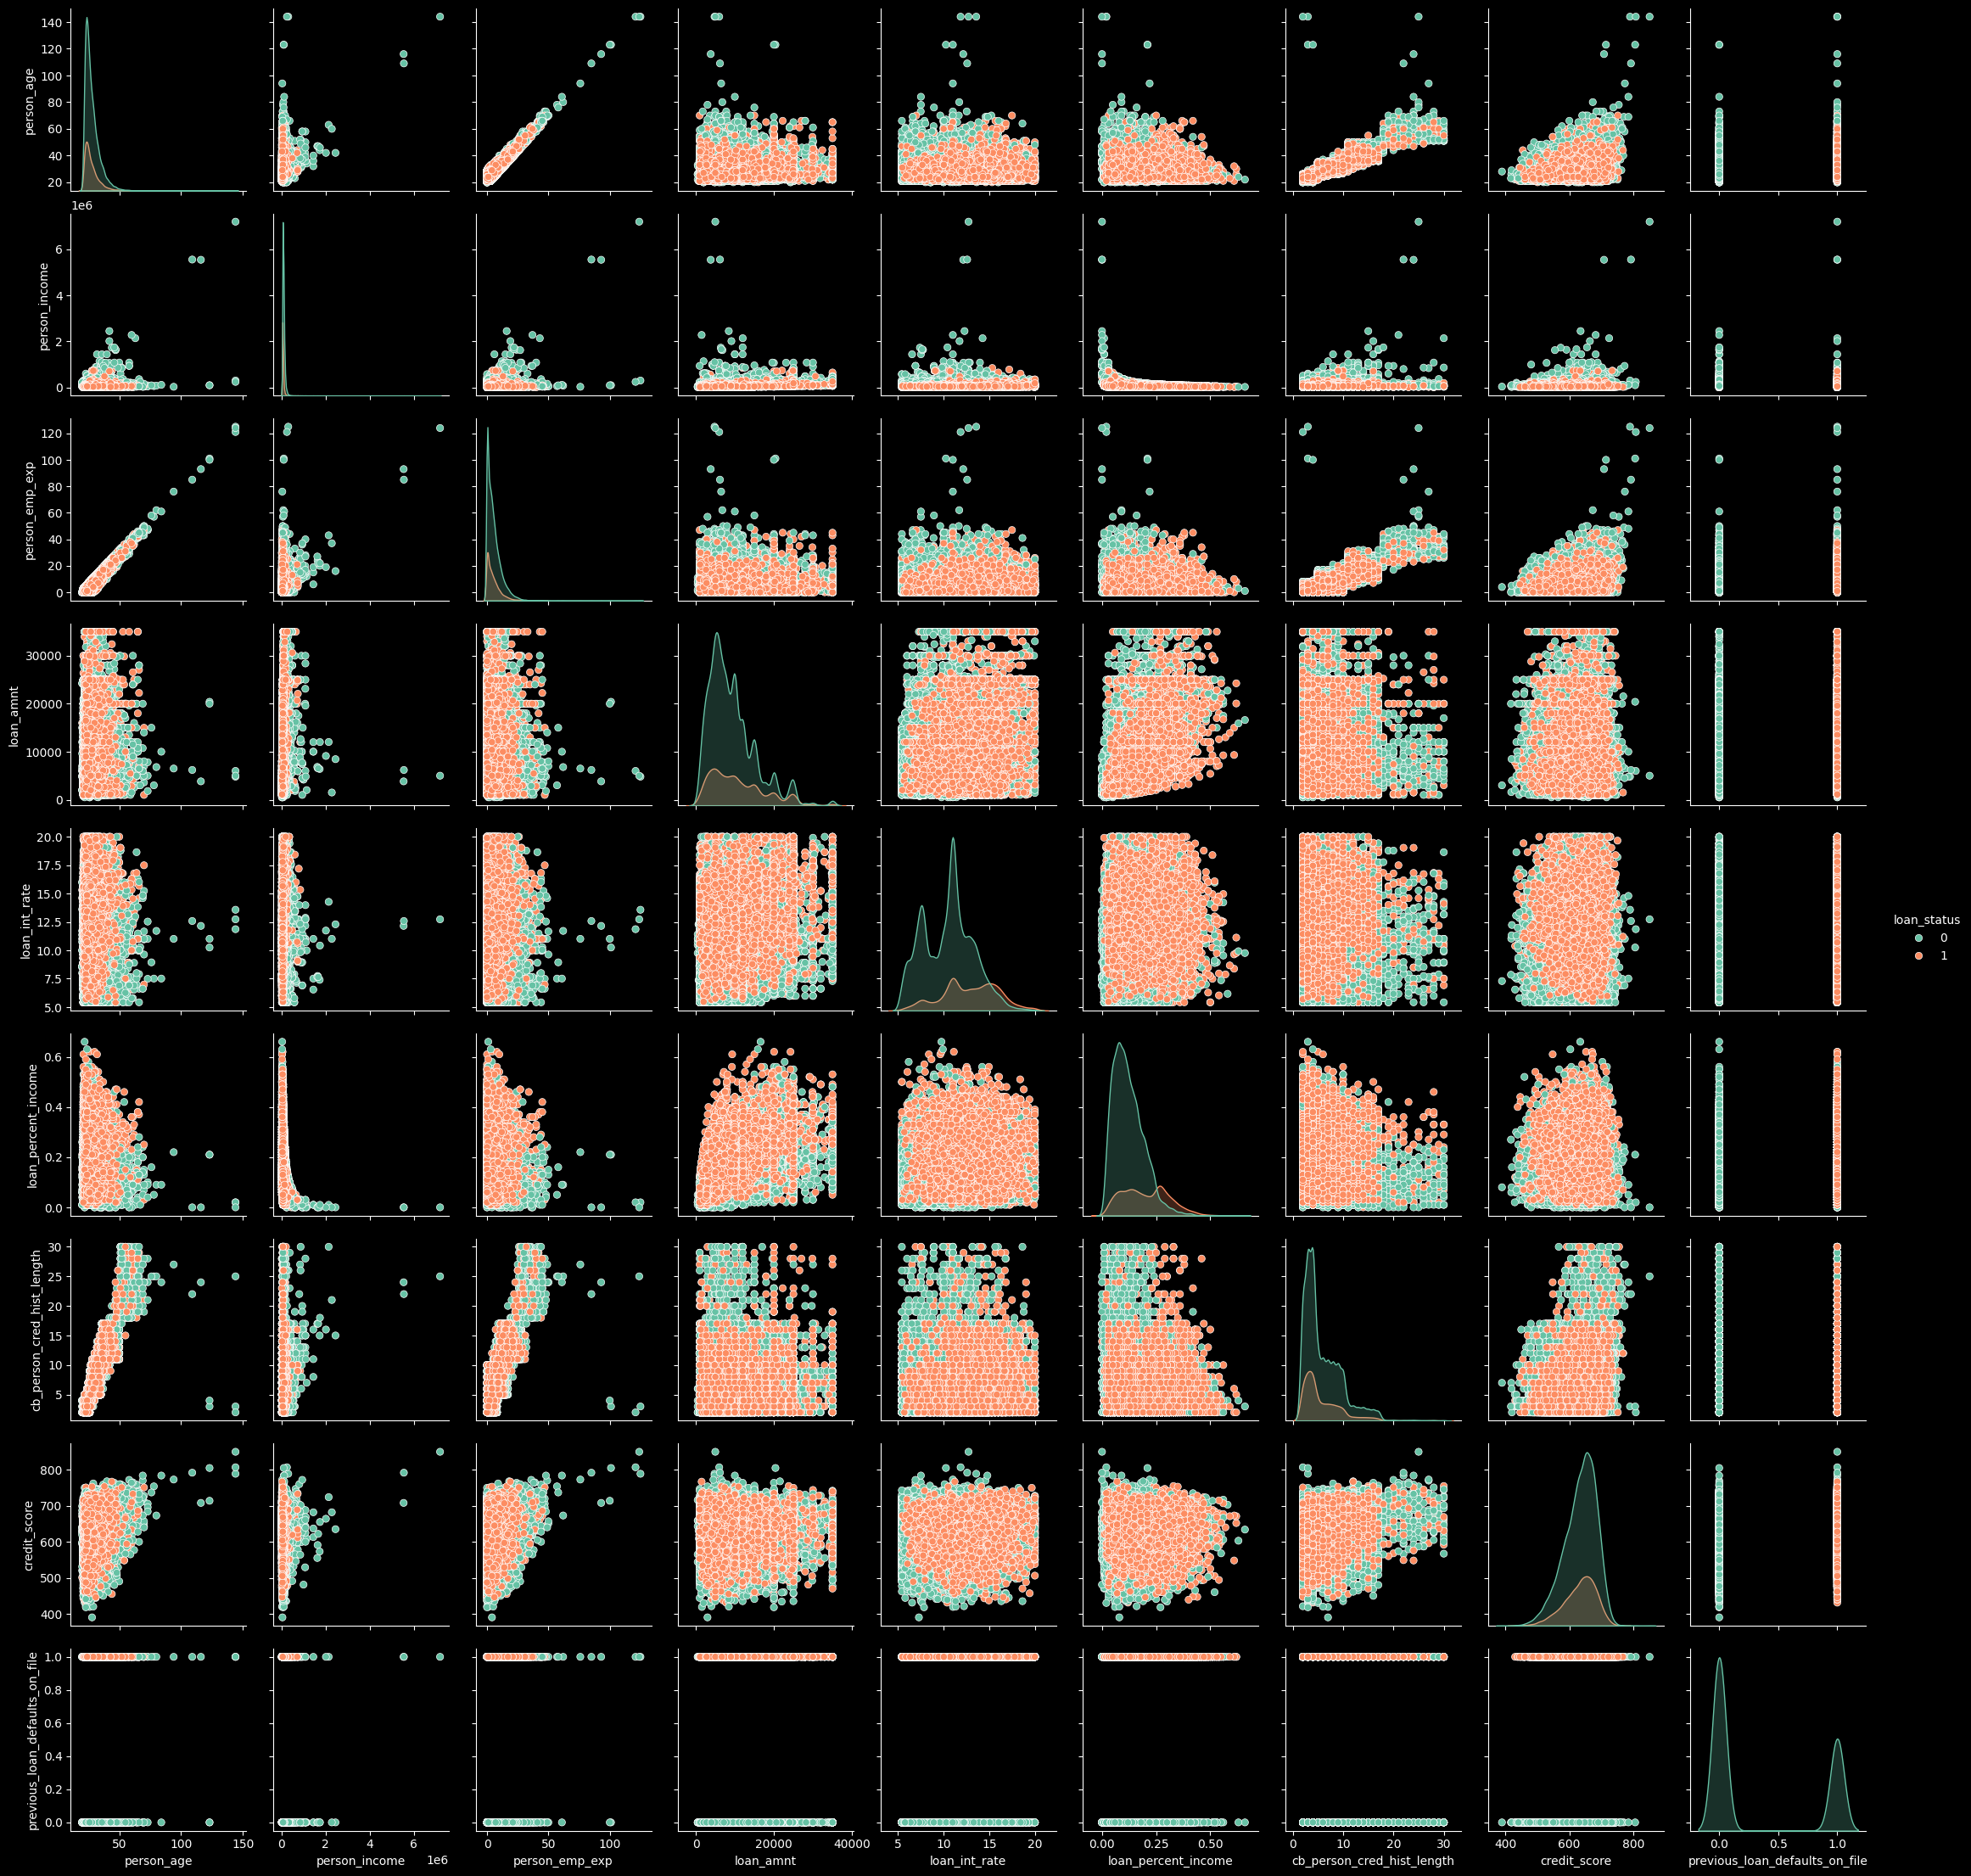

In [27]:
plot_df = numerical_df.copy()
plot_df['loan_status'] = df['loan_status']

sns.pairplot(plot_df, hue='loan_status', palette='Set2')
plt.show()

In [28]:
# Outlier Detection
def detect_outliers(df):
    outlier_mask = pd.Series(False, index=df.index)
    
    for col in df.select_dtypes(include=['number']).columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
    
        col_outliers = (df[col] < lower_bound) | (df[col] > upper_bound)
        outlier_mask = outlier_mask | col_outliers  
    
    return df[outlier_mask]

In [29]:
outlier_df = detect_outliers(df)
print(f'Number of outliers present in the dataset is {outlier_df.shape[0]} ')

Number of outliers present in the dataset is 15438 


Note :- **"We can't remove or even trim these outliers because doing so would delete all rows where loan_status equals 1."**

# Feature Engineering

In [30]:
# Feature Engineering related libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [31]:
# Extraxt Input and output column
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [32]:
# Split the data into train and test part
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [33]:
print(f"Shape of the train data is {X_train.shape[0]}")
print(f'Shape of the test data is {X_test.shape[0]}')

Shape of the train data is 36000
Shape of the test data is 9000


In [34]:
# Transform the categorical columns into numerical representation
trf = ColumnTransformer([
    ('ohe', OneHotEncoder(sparse_output=False, drop='first', handle_unknown='ignore'),[1,2,5,7,12]),
], remainder='passthrough')
trf

ColumnTransformer(remainder='passthrough',
                  transformers=[('ohe',
                                 OneHotEncoder(drop='first',
                                               handle_unknown='ignore',
                                               sparse_output=False),
                                 [1, 2, 5, 7, 12])])

In [35]:
X_train_t = trf.fit_transform(X_train)
X_test_t = trf.transform(X_test)

# Model Building

In [36]:
# Model Building related libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

# testing related libraries
from sklearn.metrics import accuracy_score,precision_score, recall_score, roc_auc_score
from sklearn.model_selection import cross_validate, cross_val_score

In [37]:
models = {'DecisionTreeClassifier' : DecisionTreeClassifier(random_state=42),
          'RandomForestClassifier' : RandomForestClassifier(random_state=42),
          'ExtraTreesClassifier' : ExtraTreesClassifier(),
          'XGBClassifier' : XGBClassifier(random_state = 42),
          'GradientBoostingClassifier' : GradientBoostingClassifier()}

In [38]:
for model_name, model in models.items():
    print(f"\n=== {model_name.upper()} ===")
    print(f"Model type: {type(model).__name__}")
    print(model)

    params = model.get_params()
    max_len = max(len(str(k)) for k in params.keys())
    for param, value in params.items():
        print(f"{str(param).ljust(max_len)} : {value}")

    print("\n" + "*" * 50)



=== DECISIONTREECLASSIFIER ===
Model type: DecisionTreeClassifier
DecisionTreeClassifier(random_state=42)
ccp_alpha                : 0.0
class_weight             : None
criterion                : gini
max_depth                : None
max_features             : None
max_leaf_nodes           : None
min_impurity_decrease    : 0.0
min_samples_leaf         : 1
min_samples_split        : 2
min_weight_fraction_leaf : 0.0
monotonic_cst            : None
random_state             : 42
splitter                 : best

**************************************************

=== RANDOMFORESTCLASSIFIER ===
Model type: RandomForestClassifier
RandomForestClassifier(random_state=42)
bootstrap                : True
ccp_alpha                : 0.0
class_weight             : None
criterion                : gini
max_depth                : None
max_features             : sqrt
max_leaf_nodes           : None
max_samples              : None
min_impurity_decrease    : 0.0
min_samples_leaf         : 1
min_samples_sp

In [39]:
cv_results = {
    'Model' : [],
    'Accuracy' : [],
    'Precision' : [],
    'Recall' : [],
    'Roc Auc' : []
}

for model_name, model in models.items():
    print(f"\n {'='*50}")
    print(f'Model Evaluation {model_name}')
    print('='*50)

    scoring = {
        'accuracy':"accuracy",
        'precision':"precision",
        'recall':"recall",
        'roc_auc':"roc_auc"
    }
    scores = cross_validate(model, X_train_t, y_train, cv = 5, scoring = scoring)
    cv_results['Model'].append(model_name)
    cv_results['Accuracy'].append(scores['test_accuracy'].mean())
    cv_results['Precision'].append(scores['test_precision'].mean())
    cv_results['Recall'].append(scores['test_recall'].mean())
    cv_results['Roc Auc'].append(scores['test_roc_auc'].mean())

    print(f"\n{'Metric':<15} {'Mean':<10} {'Std':<10}")
    print("-"*50)
    for matrix in ["accuracy", "precision", "recall", "roc_auc"]:
        mean_score = scores[f'test_{matrix}'].mean()
        std_score = scores[f'test_{matrix}'].std()
        print(f"{matrix:<15}  {mean_score:.4f}   ±{std_score:.4f}")




Model Evaluation DecisionTreeClassifier

Metric          Mean       Std       
--------------------------------------------------
accuracy         0.8991   ±0.0032
precision        0.7707   ±0.0085
recall           0.7766   ±0.0072
roc_auc          0.8553   ±0.0043

Model Evaluation RandomForestClassifier

Metric          Mean       Std       
--------------------------------------------------
accuracy         0.9264   ±0.0042
precision        0.8919   ±0.0134
recall           0.7607   ±0.0142
roc_auc          0.9731   ±0.0018

Model Evaluation ExtraTreesClassifier

Metric          Mean       Std       
--------------------------------------------------
accuracy         0.9162   ±0.0041
precision        0.8556   ±0.0134
recall           0.7488   ±0.0132
roc_auc          0.9661   ±0.0017

Model Evaluation XGBClassifier

Metric          Mean       Std       
--------------------------------------------------
accuracy         0.9324   ±0.0045
precision        0.8822   ±0.0150
recall     

In [40]:
result_df = pd.DataFrame(cv_results)
result_df.sort_values(by = 'Precision', ascending=False)

Model  Accuracy  Precision    Recall   Roc Auc
1      RandomForestClassifier  0.926389   0.891896  0.760701  0.973134
3               XGBClassifier  0.932361   0.882172  0.802628  0.977408
4  GradientBoostingClassifier  0.923333   0.876515  0.762078  0.971708
2        ExtraTreesClassifier  0.916167   0.855626  0.748811  0.966056
0      DecisionTreeClassifier  0.899111   0.770670  0.776596  0.855328

### Apply SMOTE to handle class imbalance in the dataset.

In [41]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
X = trf.fit_transform(X)
X_resample , y_resample = sm.fit_resample(X,y)

In [42]:
print(f"After Smote technique the shape of the input dataset is {X_resample.shape[0]}")

After Smote technique the shape of the input dataset is 70000


In [43]:
X_train_smote, X_test_smote, y_train_smote, y_test_smote = train_test_split(X_resample, y_resample, test_size = 0.2, random_state = 42)

In [44]:
cv_results_smote = {
    'Model' : [],
    'Accuracy' : [],
    'Precision' : [],
    'Recall' : [],
    'Roc Auc' : []
}

for model_name, model in models.items():
    print(f"\n {'='*50}")
    print(f'Model Evaluation {model_name}')
    print('='*50)

    scoring = {
        'accuracy':"accuracy",
        'precision':"precision",
        'recall':"recall",
        'roc_auc':"roc_auc"
    }
    scores = cross_validate(model, X_train_smote, y_train_smote, cv = 5, scoring = scoring)
    cv_results_smote['Model'].append(model_name)
    cv_results_smote['Accuracy'].append(scores['test_accuracy'].mean())
    cv_results_smote['Precision'].append(scores['test_precision'].mean())
    cv_results_smote['Recall'].append(scores['test_recall'].mean())
    cv_results_smote['Roc Auc'].append(scores['test_roc_auc'].mean())

    print(f"\n{'Metric':<15} {'Mean':<10} {'Std':<10}")
    print("-"*50)
    for matrix in ["accuracy", "precision", "recall", "roc_auc"]:
        mean_score = scores[f'test_{matrix}'].mean()
        std_score = scores[f'test_{matrix}'].std()
        print(f"{matrix:<15}  {mean_score:.4f}   ±{std_score:.4f}")




Model Evaluation DecisionTreeClassifier

Metric          Mean       Std       
--------------------------------------------------
accuracy         0.9270   ±0.0026
precision        0.9258   ±0.0026
recall           0.9286   ±0.0036
roc_auc          0.9270   ±0.0026

Model Evaluation RandomForestClassifier

Metric          Mean       Std       
--------------------------------------------------
accuracy         0.9524   ±0.0029
precision        0.9601   ±0.0033
recall           0.9441   ±0.0033
roc_auc          0.9922   ±0.0006

Model Evaluation ExtraTreesClassifier

Metric          Mean       Std       
--------------------------------------------------
accuracy         0.9479   ±0.0022
precision        0.9505   ±0.0037
recall           0.9451   ±0.0020
roc_auc          0.9916   ±0.0005

Model Evaluation XGBClassifier

Metric          Mean       Std       
--------------------------------------------------
accuracy         0.9563   ±0.0028
precision        0.9648   ±0.0043
recall     

In [45]:
result_df_smote = pd.DataFrame(cv_results_smote)
result_df_smote.sort_values(by = 'Precision', ascending=False)

Model  Accuracy  Precision    Recall   Roc Auc
3               XGBClassifier  0.956268   0.964761  0.947222  0.993587
1      RandomForestClassifier  0.952411   0.960122  0.944117  0.992173
2        ExtraTreesClassifier  0.947911   0.950524  0.945116  0.991592
4  GradientBoostingClassifier  0.943911   0.943994  0.943939  0.990036
0      DecisionTreeClassifier  0.927036   0.925792  0.928630  0.927034

#### After applying SMOTE, the accuracy, precision, recall, and ROC AUC scores improved.
The best performing model was XGBClassifier with the following metrics:
- Accuracy = 0.956268
- Precision = 0.964761
- Recall = 0.947222
- Roc Auc = 0.993587

# ANN Model using TensorFlow/keras

In [46]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import *
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping

In [47]:
from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler()
X_train_smote_t = scale.fit_transform(X_train_smote)
X_test_smote_t = scale.transform(X_test_smote)

In [48]:
model = Sequential()

model.add(Dense(128, activation = 'relu', input_dim = X_train_smote.shape[1], kernel_initializer = "he_normal"))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(128, activation = 'relu', input_dim = X_train_smote.shape[1], kernel_initializer = "he_normal"))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(64, activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(32, activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(1, activation = 'sigmoid'))

In [49]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['recall']
)

In [50]:
callback = EarlyStopping(
    monitor = 'val_loss',
    patience = 10,
    min_delta = 0.0001,
    mode = "auto",
    restore_best_weights=True)

In [51]:
history = model.fit(X_train_smote_t, y_train_smote,
                    epochs=500,
                    batch_size = 256,
                    validation_data = [X_test_smote_t, y_test_smote],
                    callbacks = [callback])

Epoch 1/500
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3970 - recall: 0.8688 - val_loss: 0.2718 - val_recall: 0.9807
Epoch 2/500
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2431 - recall: 0.9087 - val_loss: 0.2207 - val_recall: 0.9657
Epoch 3/500
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2282 - recall: 0.9138 - val_loss: 0.2058 - val_recall: 0.9571
Epoch 4/500
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2171 - recall: 0.9154 - val_loss: 0.1869 - val_recall: 0.9389
Epoch 5/500
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2105 - recall: 0.9126 - val_loss: 0.1794 - val_recall: 0.9356
Epoch 6/500
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2014 - recall: 0.9181 - val_loss: 0.1755 - val_recall: 0.9329
Epoch 7/500
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2001 - recall: 0.9119 - val_loss: 0.1735 - val_recall: 0.9414
Epoch 8/500
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1961 - recall: 0.9170 - val_loss: 0.1664 - val_recall: 0.9259


##### **Based on the output, the performance of the ANN model is suboptimal and suggests that it may not be as effective as the XGBoost Classifier. Further tuning or alternative approaches might be necessary to improve the results**

In [52]:
model.save('my_model.keras')

## Final model

In [53]:
from imblearn.pipeline import Pipeline 

In [54]:
# Extract input and output columns
X = df.drop(columns=['loan_status'])
y = df['loan_status']

In [55]:
# Define ColumnTransformer for categorical columns (assuming columns at indices [1,2,5,7,12])
trf = ColumnTransformer([
    ('ohe', OneHotEncoder(sparse_output=False, drop='first', handle_unknown='ignore'), [1,2,5,7,12])
], remainder = 'passthrough')


In [56]:
# Build pipeline with preprocessing, SMOTE, and model
pipe = Pipeline([
    ('trf', trf),
    ('smote', SMOTE(random_state=42)),
    ('model', XGBClassifier(random_state=42))
])

In [57]:
# Fit the pipeline
pipe.fit(X, y)

Pipeline(steps=[('trf',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False),
                                                  [1, 2, 5, 7, 12])])),
                ('smote', SMOTE(random_state=42)),
                ('model',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None, device=N...
                               feature_types=None, feature_weights=None,
                               gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, ...))])

### Download the model using pickle library

In [58]:
import pickle

with open('Loan_approval_pipeline.pkl', 'wb') as file:
    pickle.dump(pipe, file)

with open('df.pkl', 'wb') as file:
    pickle.dump(X, file)